In [1]:
import numpy as np
import xml.etree.ElementTree as ET
import math
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tree = ET.parse('polska')
root = tree.getroot()

In [3]:
Nodes = {}
for node in root.findall(".//{http://sndlib.zib.de/network}node"):
    x = node.find(".//{http://sndlib.zib.de/network}x")
    y = node.find(".//{http://sndlib.zib.de/network}y")
    Nodes[node.get('id')] = [float(x.text), float(y.text)]
Nodes

{'Gdansk': [18.6, 54.2],
 'Bydgoszcz': [17.9, 53.1],
 'Kolobrzeg': [16.1, 54.2],
 'Katowice': [18.8, 50.3],
 'Krakow': [19.8, 50.0],
 'Bialystok': [23.1, 53.1],
 'Lodz': [19.4, 51.7],
 'Poznan': [16.8, 52.4],
 'Rzeszow': [21.9, 50.0],
 'Szczecin': [14.5, 53.4],
 'Warsaw': [21.0, 52.2],
 'Wroclaw': [16.9, 51.1]}

In [4]:
Links = {}
for link in root.findall(".//{http://sndlib.zib.de/network}link"):
    source = link.find(".//{http://sndlib.zib.de/network}source")
    target = link.find(".//{http://sndlib.zib.de/network}target")
    setupCost = link.find(".//{http://sndlib.zib.de/network}setupCost")
    
    longitudeS = Nodes[source.text][0]
    longitudeT = Nodes[target.text][0]
    latitudeS = Nodes[source.text][1]
    latitudeT = Nodes[target.text][1]
    
    #distance1 = math.sqrt((longitudeS - longitudeT)**2 + (latitudeS - latitudeT)**2) * 73
    distance2 = math.acos(math.sin(math.radians(latitudeS))*math.sin(math.radians(latitudeT)) + math.cos(math.radians(latitudeS))*
                          math.cos(math.radians(latitudeT))*math.cos(math.radians(longitudeT - longitudeS)) )* 6371
    Links[link.get('id')] = distance2

In [5]:
min(Links.values())

78.6728876043855

In [6]:
def addNodetoPath(node1, node2, input_list):
    if len(input_list) == 2 :
        if node1 in input_list and node1 == input_list[0] :
            #print('pierwszy przypadek')
            second_node = input_list[1]
            input_list[1] = input_list[0]
            input_list[0] = second_node
            input_list.append(node2)
            return input_list
        if node2 in input_list and node2 == input_list[0] :
            #print('drugi przypadek')
            second_node = input_list[1]
            input_list[1] = input_list[0]
            input_list[0] = second_node
            input_list.append(node1)
            return input_list  
    if node1 not in input_list : 
        input_list.append(node1)
    if node2 not in input_list : 
        input_list.append(node2)
        
    return input_list

In [7]:
n = 0
Y_values = []
input_list = []
for demand in root.findall(".//{http://sndlib.zib.de/network}demand"):
    source = demand.find(".//{http://sndlib.zib.de/network}source")
    target = demand.find(".//{http://sndlib.zib.de/network}target")
    demandValue = demand.find(".//{http://sndlib.zib.de/network}demandValue")
    #print(demand.attrib)
    print("Source: " + source.text)
    print("Target: " + target.text)
    print("DemandValue: " + demandValue.text)
    
    admissiblePaths = demand.findall(".//{http://sndlib.zib.de/network}admissiblePath")
    for path in admissiblePaths:
        path_links = path.findall(".//{http://sndlib.zib.de/network}linkId")
        values = 0;
        node_list=[]
        for link_id in path_links:
            values = values + 300./float(Links[link_id.text])
            words = link_id.text.split('_')
            node_list = addNodetoPath(words[1], words[2], node_list)
        input_list.append(node_list.copy()) 
        size = float(len(node_list))
        values= values + 300./min(Links.values())*(11-size)
        values = values + 10./(size-1)
        Y_values.append(values)
        n = n+1
        print(node_list)
        print(values)  
        node_list.clear()
"All paths: {}".format(n)

Source: Gdansk
Target: Bydgoszcz
DemandValue: 195.0
['0', '2', '1']
39.111775527610455
['0', '10', '1']
37.89570976324386
['0', '2', '9', '7', '1']
33.77412898818498
['0', '5', '10', '1']
33.98536367924393
['0', '10', '4', '3', '11', '7', '1']
29.721523571155718
['0', '2', '9', '7', '11', '3', '4', '10', '1']
24.68610440131703
['0', '5', '8', '4', '10', '1']
27.300950612745368
Source: Gdansk
Target: Kolobrzeg
DemandValue: 158.0
['0', '2']
46.16431196677906
['0', '10', '1', '2']
34.17650665740858
['0', '5', '10', '1', '2']
31.09949390674199
['0', '10', '4', '3', '11', '7', '1', '2']
27.430891893891868
['0', '10', '1', '7', '9', '2']
30.005526784649767
['0', '5', '8', '4', '10', '1', '2']
24.91508084024343
['0', '5', '10', '4', '3', '11', '7', '1', '2']
25.008641047987183
Source: Gdansk
Target: Katowice
DemandValue: 174.0
['0', '5', '8', '4', '3']
32.97309041124482
['0', '10', '4', '3']
36.09510728532111
['0', '5', '10', '4', '3']
33.018094534654516
['0', '5', '8', '4', '10', '6', '3']
2

'All paths: 462'

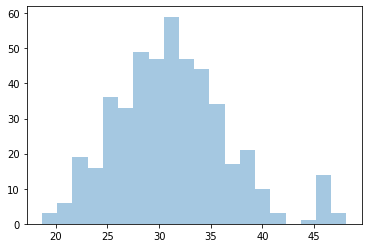

In [8]:
sns.distplot(Y_values,bins=20, kde=False);

In [9]:
"All paths: {}".format(n)

'All paths: 462'

In [10]:
[i for (i,v) in zip(input_list, Y_values) if v>32]

[['0', '2', '1'],
 ['0', '10', '1'],
 ['0', '2', '9', '7', '1'],
 ['0', '5', '10', '1'],
 ['0', '2'],
 ['0', '10', '1', '2'],
 ['0', '5', '8', '4', '3'],
 ['0', '10', '4', '3'],
 ['0', '5', '10', '4', '3'],
 ['0', '10', '6', '3'],
 ['0', '5', '10', '6', '3'],
 ['0', '5', '8', '4'],
 ['0', '10', '4'],
 ['0', '5', '10', '4'],
 ['0', '10', '6', '3', '4'],
 ['0', '5'],
 ['0', '10', '5'],
 ['0', '2', '1', '10', '5'],
 ['0', '10', '6'],
 ['0', '5', '10', '6'],
 ['0', '2', '1', '10', '6'],
 ['0', '10', '4', '3', '6'],
 ['0', '2', '1', '7'],
 ['0', '10', '1', '7'],
 ['0', '2', '9', '7'],
 ['0', '5', '10', '1', '7'],
 ['0', '5', '8'],
 ['0', '10', '4', '8'],
 ['0', '10', '5', '8'],
 ['0', '2', '9'],
 ['0', '2', '1', '7', '9'],
 ['0', '10', '1', '7', '9'],
 ['0', '10'],
 ['0', '2', '1', '10'],
 ['0', '5', '10'],
 ['0', '2', '1', '7', '11'],
 ['0', '2', '9', '7', '11'],
 ['0', '10', '4', '3', '11'],
 ['1', '2'],
 ['1', '7', '9', '2'],
 ['1', '10', '0', '2'],
 ['1', '10', '4', '3'],
 ['1', '10', '

## Some statistics

In [11]:
"Min: {}".format(min(Y_values))

'Min: 18.680154700631682'

In [12]:
"Max: {}".format(max(Y_values))

'Max: 48.13257770689441'

In [13]:
"Mean: {}".format(statistics.mean(Y_values))

'Mean: 31.264953871433754'

## Calculate OSNR values

In [14]:
Y_output = np.array(Y_values)
Y_output.shape

(462,)

In [15]:
#max_val=max(Y_output)
#min_val=min(Y_output)

In [16]:
#Y_output_s = 10 + 35*(Y_output/max_val)

In [17]:
#min(Y_output_s)

In [18]:
#max(Y_output_s)

In [19]:
#sns.distplot(Y_output_s,bins=30, kde=False);

In [20]:
delimit_values=np.quantile(Y_output, [0.25,0.5,0.75])
delimit_values

array([27.69028916, 30.95785005, 34.4318863 ])

In [21]:
Y_output[Y_output<=delimit_values[0]]=0
Y_output[(Y_output>delimit_values[0]) & (Y_output<=delimit_values[1])]=1
Y_output[(Y_output>delimit_values[1]) & (Y_output<=delimit_values[2])]=2
Y_output[Y_output>delimit_values[2]]=3

In [22]:
Y_values

[39.111775527610455,
 37.89570976324386,
 33.77412898818498,
 33.98536367924393,
 29.721523571155718,
 24.68610440131703,
 27.300950612745368,
 46.16431196677906,
 34.17650665740858,
 31.09949390674199,
 27.430891893891868,
 30.005526784649767,
 24.91508084024343,
 25.008641047987183,
 32.97309041124482,
 36.09510728532111,
 33.018094534654516,
 26.1610444651115,
 30.939635729111004,
 35.422470282276656,
 32.345457531610066,
 33.806423744578154,
 37.76177395198777,
 33.85142786798785,
 31.439635729111004,
 34.58913694894332,
 31.84545753161006,
 27.768655856352193,
 45.25465530393023,
 38.33128879246759,
 32.00915056959082,
 30.48020905930236,
 28.338170696832012,
 25.873293587426318,
 25.824737503092262,
 30.520482297353006,
 39.041745062835126,
 35.13139897883521,
 28.44698591233664,
 27.99491179763257,
 32.71960683995836,
 33.309165838095964,
 36.424592731378674,
 35.20852696701208,
 35.62797845108343,
 26.68180623974882,
 32.13151421634548,
 31.075373034054163,
 28.97350647504627,


In [23]:
X_input = np.full((462,11), -1)
X_input.shape

(462, 11)

In [24]:
n = 0
for path in input_list:
    for i in range(len(path)):
        X_input[n][i] = path[i]
    n =n+1

In [25]:
X_input

array([[ 0,  2,  1, ..., -1, -1, -1],
       [ 0, 10,  1, ..., -1, -1, -1],
       [ 0,  2,  9, ..., -1, -1, -1],
       ...,
       [10,  1,  7, ..., -1, -1, -1],
       [10,  6,  3, ..., -1, -1, -1],
       [10,  4,  8, ..., 11, -1, -1]])

# random forest

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import plot

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X_input,Y_output, test_size=0.25)

In [28]:
n_B=int(math.sqrt(len(X_train)))
n_B

18

In [29]:
rf = RandomForestRegressor(n_estimators = n_B, max_samples=n_B, max_features="auto", random_state = 42)
rf.fit(X_train, Y_train);
predictions = rf.predict(X_test)
predictions=np.round(predictions,0)

In [30]:
error= predictions==Y_test
np.sum(error)/len(error)

0.6810344827586207

## Accuracy for different number of trees in random forest 

In [31]:
B_values=[]
acc_values=[]

In [32]:
for n in range(int(math.sqrt(n_B)),20*n_B, 2):
    rf = RandomForestRegressor(n_estimators =n ,max_features="auto", random_state = 42)
    rf.fit(X_train, Y_train);
    predictions = rf.predict(X_test)
    predictions=np.round(predictions,0)
    acc_values.append(np.sum(predictions==Y_test)/len(Y_test))
    B_values.append(n)
    

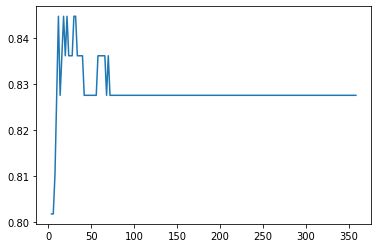

In [33]:
plot(B_values,acc_values)

In [34]:
best_treeN=[x for (x,y) in zip(B_values,acc_values) if y==max(acc_values)][0]
best_treeN

12

## Accuracy for different depths of trees

In [35]:
Depth_values=[]
acc_values=[]

In [36]:
for n in range(1,12):
    rf = RandomForestRegressor(n_estimators =best_treeN ,max_depth=n,max_samples=n,max_features="auto", random_state = 42)
    rf.fit(X_train, Y_train);
    predictions = rf.predict(X_test)
    predictions=np.round(predictions,0)
    acc_values.append(np.sum(predictions==Y_test)/len(Y_test))
    Depth_values.append(n)

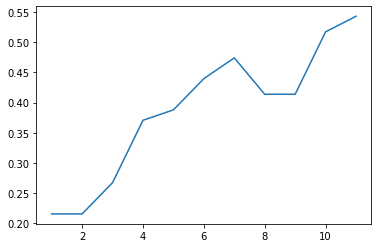

In [37]:
plot(Depth_values,acc_values)

In [38]:
best_depth=[x for (x,y) in zip(Depth_values,acc_values) if y==max(acc_values)][0]
best_depth

11

In [39]:
max(acc_values)

0.5431034482758621

## Accuracy for different sizes of samples to draw from X to train each base estimator

In [40]:
B1_values=[]
acc_values=[]

In [41]:
for n in range(int(math.sqrt(n_B)),len(X_train)):
    rf = RandomForestRegressor(n_estimators =best_treeN,max_depth=best_depth,max_samples=n, bootstrap=True,max_features="auto", random_state = 42)
    rf.fit(X_train, Y_train);
    predictions = rf.predict(X_test)
    predictions=np.round(predictions,0)
    acc_values.append(np.sum(predictions==Y_test)/len(Y_test))
    B1_values.append(n)
    

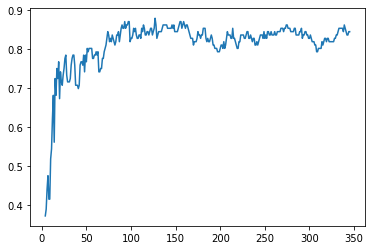

In [42]:
plot(B1_values,acc_values)

In [43]:
best_bootstrap=[x for (x,y) in zip(B1_values,acc_values) if y==max(acc_values)][0]
best_bootstrap

127

In [44]:
acc_values[315]

0.8189655172413793

In [45]:
acc_values[106]

0.8362068965517241

In [46]:
best_bootstrap=acc_values[106]

## Neural networks

In [47]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [48]:
X_input

array([[ 0,  2,  1, ..., -1, -1, -1],
       [ 0, 10,  1, ..., -1, -1, -1],
       [ 0,  2,  9, ..., -1, -1, -1],
       ...,
       [10,  1,  7, ..., -1, -1, -1],
       [10,  6,  3, ..., -1, -1, -1],
       [10,  4,  8, ..., 11, -1, -1]])

In [49]:
Y_output

array([3., 3., 2., 2., 1., 0., 0., 3., 2., 2., 0., 1., 0., 0., 2., 3., 2.,
       0., 1., 3., 2., 2., 3., 2., 2., 3., 2., 1., 3., 3., 2., 1., 1., 0.,
       0., 1., 3., 3., 1., 1., 2., 2., 3., 3., 3., 0., 2., 2., 1., 3., 2.,
       2., 1., 2., 1., 0., 3., 2., 2., 1., 1., 2., 0., 3., 3., 3., 1., 1.,
       1., 0., 2., 1., 2., 1., 2., 1., 0., 3., 3., 2., 0., 2., 0., 0., 1.,
       0., 1., 1., 1., 0., 3., 1., 0., 1., 2., 1., 3., 3., 3., 1., 0., 2.,
       3., 1., 1., 0., 0., 1., 2., 1., 0., 0., 3., 3., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 3., 2., 3., 3., 0., 2., 0., 0., 0., 3., 3., 1.,
       0., 2., 2., 1., 3., 0., 0., 2., 2., 1., 0., 1., 2., 2., 1., 0., 1.,
       2., 2., 2., 2., 2., 1., 2., 2., 3., 3., 3., 1., 1., 1., 1., 1., 3.,
       3., 2., 0., 0., 2., 3., 3., 1., 2., 1., 0., 1., 2., 2., 2., 1., 1.,
       2., 2., 3., 3., 1., 0., 0., 0., 0., 3., 3., 3., 2., 1., 1., 1., 3.,
       1., 2., 3., 1., 1., 0., 3., 3., 0., 0., 1., 2., 0., 3., 3., 3., 1.,
       0., 2., 2., 3., 3.

In [60]:
Y_output_s = np.zeros((462,4))
for i in range(Y_output.shape[0]):
    if Y_output[i] == 0 : Y_output_s[i][0] = 1
    elif Y_output[i] == 1 : Y_output_s[i][1] = 1
    elif Y_output[i] == 2 : Y_output_s[i][2] = 1
    else : Y_output_s[i][3] = 1

In [61]:
Y_output_s

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_input,Y_output_s, test_size=0.25)

## One hidden layer

In [78]:
model = Sequential()
model.add(Dense(10, input_dim = 11, activation = 'sigmoid'))
model.add(Dense(4, activation ='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 44        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
epochs = 150
batch_size = 10
callback_early_stopping =EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

In [80]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 150, validation_split= 0.15, verbose = 1, 
         callbacks = [callback_early_stopping])

Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.8861 - accuracy: 0.2211 - val_loss: 1.6298 - val_accuracy: 0.2885
Epoch 2/150
294/294 [==============================] - 0s 584us/step - loss: 1.7097 - accuracy: 0.2449 - val_loss: 1.4949 - val_accuracy: 0.3462
Epoch 3/150
294/294 [==============================] - 0s 501us/step - loss: 1.5674 - accuracy: 0.2585 - val_loss: 1.3904 - val_accuracy: 0.3462
Epoch 4/150
294/294 [==============================] - 0s 501us/step - loss: 1.4529 - accuracy: 0.2687 - val_loss: 1.3147 - val_accuracy: 0.3269
Epoch 5/150
294/294 [==============================] - 0s 526us/step - loss: 1.3660 - accuracy: 0.2959 - val_loss: 1.2596 - val_accuracy: 0.3462
Epoch 6/150
294/294 [==============================] - 0s 498us/step - loss: 1.3009 - accuracy: 0.3503 - val_loss: 1.2175 - val_accuracy: 0.3462
Epoch 7/150
294/294 [==============================] - 0s 591us/step - loss: 1.2495 - a

294/294 [==============================] - 0s 531us/step - loss: 0.5869 - accuracy: 0.7687 - val_loss: 0.5722 - val_accuracy: 0.7885
Epoch 57/150
294/294 [==============================] - 0s 358us/step - loss: 0.5839 - accuracy: 0.7755 - val_loss: 0.5710 - val_accuracy: 0.7885
Epoch 58/150
294/294 [==============================] - 0s 351us/step - loss: 0.5813 - accuracy: 0.7755 - val_loss: 0.5694 - val_accuracy: 0.7885
Epoch 59/150
294/294 [==============================] - 0s 364us/step - loss: 0.5784 - accuracy: 0.7755 - val_loss: 0.5611 - val_accuracy: 0.7885
Epoch 60/150
294/294 [==============================] - 0s 380us/step - loss: 0.5759 - accuracy: 0.7721 - val_loss: 0.5599 - val_accuracy: 0.7885
Epoch 61/150
294/294 [==============================] - 0s 509us/step - loss: 0.5728 - accuracy: 0.7721 - val_loss: 0.5610 - val_accuracy: 0.7885
Epoch 62/150
294/294 [==============================] - 0s 558us/step - loss: 0.5701 - accuracy: 0.7857 - val_loss: 0.5616 - val_accuracy

294/294 [==============================] - 0s 439us/step - loss: 0.4996 - accuracy: 0.7959 - val_loss: 0.4999 - val_accuracy: 0.8654
Epoch 113/150
294/294 [==============================] - 0s 426us/step - loss: 0.4991 - accuracy: 0.7959 - val_loss: 0.5012 - val_accuracy: 0.8654
Epoch 114/150
294/294 [==============================] - 0s 364us/step - loss: 0.4980 - accuracy: 0.7925 - val_loss: 0.5022 - val_accuracy: 0.8654
Epoch 115/150
294/294 [==============================] - 0s 371us/step - loss: 0.4973 - accuracy: 0.7959 - val_loss: 0.4986 - val_accuracy: 0.8846
Epoch 116/150
294/294 [==============================] - 0s 389us/step - loss: 0.4971 - accuracy: 0.8027 - val_loss: 0.4975 - val_accuracy: 0.8846
Epoch 117/150
294/294 [==============================] - 0s 529us/step - loss: 0.4960 - accuracy: 0.7925 - val_loss: 0.4988 - val_accuracy: 0.8846
Epoch 118/150
294/294 [==============================] - 0s 540us/step - loss: 0.4947 - accuracy: 0.7925 - val_loss: 0.4959 - val_ac

In [81]:
y_test,accuracy = model.evaluate(X_test, Y_test)

116/116 [==============================] - 0s 441us/step


In [82]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.34


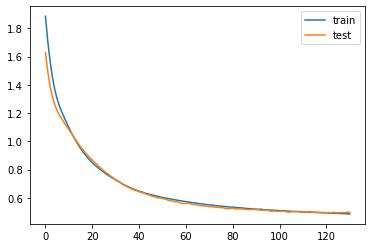

In [83]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

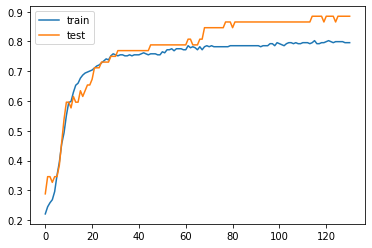

In [84]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Accurancy for different number of neurons in one hidden layer

In [94]:
k_opt_1 = int(math.sqrt(X_input[0].shape[0] * Y_output_s[0].shape[0]))

In [95]:
k_opt_2 = int(X_input[0].shape[0]/2 + Y_output_s[0].shape[0])

In [98]:
k_opt_1

6

In [99]:
k_opt_2

9

In [104]:
epochs = 150
batch_size = 10
callback_early_stopping =EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

history_all = []
accuracy_all = []
n_value = []

In [105]:
for n in range(k_opt_1-3, 64):
    model = Sequential()
    model.add(Dense(n, input_dim = 11, activation = 'sigmoid'))
    model.add(Dense(4, activation ='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
    history = model.fit(X_train, Y_train, batch_size = 10, epochs = 150, validation_split= 0.15, verbose = 1, 
         callbacks = [callback_early_stopping])
    y_test,accuracy = model.evaluate(X_test, Y_test)
    history_all.append(history)
    accuracy_all.append(accuracy)
    n_value.append(n)

Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.5826 - accuracy: 0.1156 - val_loss: 1.6327 - val_accuracy: 0.0769
Epoch 2/150
294/294 [==============================] - 0s 729us/step - loss: 1.5314 - accuracy: 0.1327 - val_loss: 1.5689 - val_accuracy: 0.0769
Epoch 3/150
294/294 [==============================] - 0s 554us/step - loss: 1.4818 - accuracy: 0.1224 - val_loss: 1.5111 - val_accuracy: 0.0577
Epoch 4/150
294/294 [==============================] - 0s 530us/step - loss: 1.4352 - accuracy: 0.1395 - val_loss: 1.4540 - val_accuracy: 0.1346
Epoch 5/150
294/294 [==============================] - 0s 602us/step - loss: 1.3888 - accuracy: 0.2279 - val_loss: 1.4098 - val_accuracy: 0.2308
Epoch 6/150
294/294 [==============================] - 0s 525us/step - loss: 1.3543 - accuracy: 0.3061 - val_loss: 1.3754 - val_accuracy: 0.2692
Epoch 7/150
294/294 [==============================] - 0s 528us/step - loss: 1.3323 - a

Epoch 57/150
294/294 [==============================] - 0s 453us/step - loss: 0.7750 - accuracy: 0.7245 - val_loss: 0.8187 - val_accuracy: 0.7692
Epoch 58/150
294/294 [==============================] - 0s 300us/step - loss: 0.7699 - accuracy: 0.7279 - val_loss: 0.8133 - val_accuracy: 0.7692
Epoch 59/150
294/294 [==============================] - 0s 388us/step - loss: 0.7657 - accuracy: 0.7279 - val_loss: 0.8074 - val_accuracy: 0.7692
Epoch 60/150
294/294 [==============================] - 0s 383us/step - loss: 0.7614 - accuracy: 0.7279 - val_loss: 0.8066 - val_accuracy: 0.7692
Epoch 61/150
294/294 [==============================] - 0s 499us/step - loss: 0.7579 - accuracy: 0.7245 - val_loss: 0.8037 - val_accuracy: 0.7692
Epoch 62/150
294/294 [==============================] - 0s 514us/step - loss: 0.7546 - accuracy: 0.7245 - val_loss: 0.7978 - val_accuracy: 0.7692
Epoch 63/150
294/294 [==============================] - 0s 390us/step - loss: 0.7505 - accuracy: 0.7279 - val_loss: 0.7944 -

294/294 [==============================] - 0s 610us/step - loss: 0.6348 - accuracy: 0.7483 - val_loss: 0.6692 - val_accuracy: 0.8077
Epoch 114/150
294/294 [==============================] - 0s 510us/step - loss: 0.6324 - accuracy: 0.7415 - val_loss: 0.6683 - val_accuracy: 0.7885
Epoch 115/150
294/294 [==============================] - 0s 386us/step - loss: 0.6309 - accuracy: 0.7517 - val_loss: 0.6672 - val_accuracy: 0.7885
Epoch 116/150
294/294 [==============================] - 0s 392us/step - loss: 0.6298 - accuracy: 0.7381 - val_loss: 0.6653 - val_accuracy: 0.8077
Epoch 117/150
294/294 [==============================] - 0s 387us/step - loss: 0.6286 - accuracy: 0.7415 - val_loss: 0.6631 - val_accuracy: 0.8077
Epoch 118/150
294/294 [==============================] - 0s 394us/step - loss: 0.6268 - accuracy: 0.7415 - val_loss: 0.6631 - val_accuracy: 0.8077
Epoch 119/150
294/294 [==============================] - 0s 510us/step - loss: 0.6258 - accuracy: 0.7449 - val_loss: 0.6617 - val_ac

294/294 [==============================] - 0s 365us/step - loss: 1.1224 - accuracy: 0.5986 - val_loss: 1.1543 - val_accuracy: 0.5192
Epoch 19/150
294/294 [==============================] - 0s 342us/step - loss: 1.1065 - accuracy: 0.6088 - val_loss: 1.1349 - val_accuracy: 0.5577
Epoch 20/150
294/294 [==============================] - 0s 394us/step - loss: 1.0893 - accuracy: 0.6190 - val_loss: 1.1078 - val_accuracy: 0.6154
Epoch 21/150
294/294 [==============================] - 0s 396us/step - loss: 1.0706 - accuracy: 0.6361 - val_loss: 1.0851 - val_accuracy: 0.6538
Epoch 22/150
294/294 [==============================] - 0s 376us/step - loss: 1.0535 - accuracy: 0.6429 - val_loss: 1.0607 - val_accuracy: 0.6731
Epoch 23/150
294/294 [==============================] - 0s 353us/step - loss: 1.0361 - accuracy: 0.6531 - val_loss: 1.0413 - val_accuracy: 0.6731
Epoch 24/150
294/294 [==============================] - 0s 404us/step - loss: 1.0205 - accuracy: 0.6667 - val_loss: 1.0233 - val_accuracy

294/294 [==============================] - 0s 780us/step - loss: 0.7144 - accuracy: 0.7755 - val_loss: 0.6726 - val_accuracy: 0.8077
Epoch 75/150
294/294 [==============================] - 0s 716us/step - loss: 0.7111 - accuracy: 0.7755 - val_loss: 0.6673 - val_accuracy: 0.8077
Epoch 76/150
294/294 [==============================] - 0s 703us/step - loss: 0.7088 - accuracy: 0.7755 - val_loss: 0.6701 - val_accuracy: 0.8077
Epoch 77/150
294/294 [==============================] - 0s 719us/step - loss: 0.7054 - accuracy: 0.7789 - val_loss: 0.6647 - val_accuracy: 0.8077
Epoch 78/150
294/294 [==============================] - 0s 494us/step - loss: 0.7025 - accuracy: 0.7755 - val_loss: 0.6587 - val_accuracy: 0.8077
Epoch 79/150
294/294 [==============================] - 0s 566us/step - loss: 0.7000 - accuracy: 0.7755 - val_loss: 0.6557 - val_accuracy: 0.8077
Epoch 80/150
294/294 [==============================] - 0s 359us/step - loss: 0.6976 - accuracy: 0.7755 - val_loss: 0.6517 - val_accuracy

Epoch 130/150
294/294 [==============================] - 0s 477us/step - loss: 0.6028 - accuracy: 0.7993 - val_loss: 0.5529 - val_accuracy: 0.8462
Epoch 131/150
294/294 [==============================] - 0s 394us/step - loss: 0.6016 - accuracy: 0.7959 - val_loss: 0.5523 - val_accuracy: 0.8462
Epoch 132/150
294/294 [==============================] - 0s 351us/step - loss: 0.6004 - accuracy: 0.7959 - val_loss: 0.5529 - val_accuracy: 0.8462
Epoch 133/150
294/294 [==============================] - 0s 343us/step - loss: 0.5987 - accuracy: 0.7959 - val_loss: 0.5501 - val_accuracy: 0.8462
Epoch 134/150
294/294 [==============================] - 0s 359us/step - loss: 0.5977 - accuracy: 0.7925 - val_loss: 0.5493 - val_accuracy: 0.8462
Epoch 135/150
294/294 [==============================] - 0s 594us/step - loss: 0.5961 - accuracy: 0.7925 - val_loss: 0.5461 - val_accuracy: 0.8462
Epoch 136/150
294/294 [==============================] - 0s 534us/step - loss: 0.5950 - accuracy: 0.7925 - val_loss: 0

294/294 [==============================] - 0s 286us/step - loss: 0.8452 - accuracy: 0.6973 - val_loss: 0.7579 - val_accuracy: 0.8462
Epoch 36/150
294/294 [==============================] - 0s 321us/step - loss: 0.8314 - accuracy: 0.7075 - val_loss: 0.7448 - val_accuracy: 0.8462
Epoch 37/150
294/294 [==============================] - 0s 474us/step - loss: 0.8202 - accuracy: 0.7109 - val_loss: 0.7316 - val_accuracy: 0.8462
Epoch 38/150
294/294 [==============================] - 0s 524us/step - loss: 0.8070 - accuracy: 0.7075 - val_loss: 0.7213 - val_accuracy: 0.8462
Epoch 39/150
294/294 [==============================] - 0s 556us/step - loss: 0.7953 - accuracy: 0.7109 - val_loss: 0.7107 - val_accuracy: 0.8269
Epoch 40/150
294/294 [==============================] - 0s 329us/step - loss: 0.7847 - accuracy: 0.7177 - val_loss: 0.7004 - val_accuracy: 0.8269
Epoch 41/150
294/294 [==============================] - 0s 554us/step - loss: 0.7746 - accuracy: 0.7211 - val_loss: 0.6924 - val_accuracy

294/294 [==============================] - 0s 312us/step - loss: 0.5821 - accuracy: 0.7687 - val_loss: 0.5350 - val_accuracy: 0.8462
Epoch 91/150
294/294 [==============================] - 0s 264us/step - loss: 0.5811 - accuracy: 0.7687 - val_loss: 0.5340 - val_accuracy: 0.8462
Epoch 92/150
294/294 [==============================] - 0s 272us/step - loss: 0.5786 - accuracy: 0.7687 - val_loss: 0.5325 - val_accuracy: 0.8654
Epoch 93/150
294/294 [==============================] - 0s 275us/step - loss: 0.5768 - accuracy: 0.7687 - val_loss: 0.5304 - val_accuracy: 0.8654
Epoch 94/150
294/294 [==============================] - 0s 507us/step - loss: 0.5759 - accuracy: 0.7653 - val_loss: 0.5330 - val_accuracy: 0.8462
Epoch 95/150
294/294 [==============================] - 0s 557us/step - loss: 0.5735 - accuracy: 0.7687 - val_loss: 0.5297 - val_accuracy: 0.8654
Epoch 96/150
294/294 [==============================] - 0s 346us/step - loss: 0.5720 - accuracy: 0.7755 - val_loss: 0.5312 - val_accuracy

Epoch 146/150
294/294 [==============================] - 0s 245us/step - loss: 0.5189 - accuracy: 0.7755 - val_loss: 0.4908 - val_accuracy: 0.8654
Epoch 147/150
294/294 [==============================] - 0s 267us/step - loss: 0.5187 - accuracy: 0.7755 - val_loss: 0.4914 - val_accuracy: 0.8654
Epoch 148/150
294/294 [==============================] - 0s 245us/step - loss: 0.5176 - accuracy: 0.7755 - val_loss: 0.4918 - val_accuracy: 0.8654
Epoch 149/150
294/294 [==============================] - 0s 251us/step - loss: 0.5170 - accuracy: 0.7755 - val_loss: 0.4897 - val_accuracy: 0.8654
Epoch 150/150
116/116 [==============================] - 0s 88us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 3ms/step - loss: 1.5756 - accuracy: 0.1497 - val_loss: 1.5419 - val_accuracy: 0.0769
Epoch 2/150
294/294 [==============================] - 0s 308us/step - loss: 1.5251 - accuracy: 0.1531 - val_loss: 1.4864 - val_accuracy: 0.0962
Epoch 3/1

294/294 [==============================] - 0s 474us/step - loss: 0.7678 - accuracy: 0.7245 - val_loss: 0.7112 - val_accuracy: 0.7692
Epoch 52/150
294/294 [==============================] - 0s 531us/step - loss: 0.7624 - accuracy: 0.7279 - val_loss: 0.7047 - val_accuracy: 0.7692
Epoch 53/150
294/294 [==============================] - 0s 395us/step - loss: 0.7572 - accuracy: 0.7245 - val_loss: 0.7024 - val_accuracy: 0.7692
Epoch 54/150
294/294 [==============================] - 0s 407us/step - loss: 0.7522 - accuracy: 0.7279 - val_loss: 0.6959 - val_accuracy: 0.7692
Epoch 55/150
294/294 [==============================] - 0s 357us/step - loss: 0.7478 - accuracy: 0.7279 - val_loss: 0.6899 - val_accuracy: 0.7692
Epoch 56/150
294/294 [==============================] - 0s 266us/step - loss: 0.7434 - accuracy: 0.7347 - val_loss: 0.6877 - val_accuracy: 0.7692
Epoch 57/150
294/294 [==============================] - 0s 284us/step - loss: 0.7387 - accuracy: 0.7381 - val_loss: 0.6817 - val_accuracy

294/294 [==============================] - 0s 295us/step - loss: 0.5787 - accuracy: 0.7517 - val_loss: 0.5581 - val_accuracy: 0.8654
Epoch 108/150
294/294 [==============================] - 0s 293us/step - loss: 0.5771 - accuracy: 0.7585 - val_loss: 0.5577 - val_accuracy: 0.8654
Epoch 109/150
294/294 [==============================] - 0s 288us/step - loss: 0.5759 - accuracy: 0.7653 - val_loss: 0.5542 - val_accuracy: 0.8654
Epoch 110/150
294/294 [==============================] - 0s 286us/step - loss: 0.5743 - accuracy: 0.7585 - val_loss: 0.5544 - val_accuracy: 0.8654
Epoch 111/150
294/294 [==============================] - 0s 297us/step - loss: 0.5728 - accuracy: 0.7585 - val_loss: 0.5553 - val_accuracy: 0.8654
Epoch 112/150
294/294 [==============================] - 0s 516us/step - loss: 0.5714 - accuracy: 0.7585 - val_loss: 0.5534 - val_accuracy: 0.8654
Epoch 113/150
294/294 [==============================] - 0s 474us/step - loss: 0.5692 - accuracy: 0.7687 - val_loss: 0.5499 - val_ac

294/294 [==============================] - 0s 386us/step - loss: 1.1401 - accuracy: 0.5272 - val_loss: 1.1488 - val_accuracy: 0.5577
Epoch 13/150
294/294 [==============================] - 0s 340us/step - loss: 1.1152 - accuracy: 0.5646 - val_loss: 1.1201 - val_accuracy: 0.5769
Epoch 14/150
294/294 [==============================] - 0s 352us/step - loss: 1.0898 - accuracy: 0.6020 - val_loss: 1.0919 - val_accuracy: 0.5962
Epoch 15/150
294/294 [==============================] - 0s 278us/step - loss: 1.0650 - accuracy: 0.6293 - val_loss: 1.0647 - val_accuracy: 0.5962
Epoch 16/150
294/294 [==============================] - 0s 265us/step - loss: 1.0400 - accuracy: 0.6463 - val_loss: 1.0406 - val_accuracy: 0.6346
Epoch 17/150
294/294 [==============================] - 0s 298us/step - loss: 1.0181 - accuracy: 0.6361 - val_loss: 1.0186 - val_accuracy: 0.6538
Epoch 18/150
294/294 [==============================] - 0s 280us/step - loss: 0.9957 - accuracy: 0.6327 - val_loss: 0.9961 - val_accuracy

294/294 [==============================] - 0s 308us/step - loss: 0.5708 - accuracy: 0.7687 - val_loss: 0.5912 - val_accuracy: 0.8269
Epoch 69/150
294/294 [==============================] - 0s 377us/step - loss: 0.5689 - accuracy: 0.7755 - val_loss: 0.5847 - val_accuracy: 0.8462
Epoch 70/150
294/294 [==============================] - 0s 332us/step - loss: 0.5659 - accuracy: 0.7755 - val_loss: 0.5824 - val_accuracy: 0.8269
Epoch 71/150
294/294 [==============================] - 0s 316us/step - loss: 0.5634 - accuracy: 0.7687 - val_loss: 0.5840 - val_accuracy: 0.8269
Epoch 72/150
294/294 [==============================] - 0s 354us/step - loss: 0.5610 - accuracy: 0.7687 - val_loss: 0.5811 - val_accuracy: 0.8269
Epoch 73/150
294/294 [==============================] - 0s 321us/step - loss: 0.5590 - accuracy: 0.7687 - val_loss: 0.5783 - val_accuracy: 0.8269
Epoch 74/150
294/294 [==============================] - 0s 300us/step - loss: 0.5558 - accuracy: 0.7721 - val_loss: 0.5739 - val_accuracy

294/294 [==============================] - 0s 266us/step - loss: 0.4984 - accuracy: 0.7789 - val_loss: 0.5386 - val_accuracy: 0.8269
Epoch 125/150
116/116 [==============================] - 0s 99us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.4365 - accuracy: 0.2313 - val_loss: 1.4823 - val_accuracy: 0.1731
Epoch 2/150
294/294 [==============================] - 0s 292us/step - loss: 1.3888 - accuracy: 0.2687 - val_loss: 1.4409 - val_accuracy: 0.2308
Epoch 3/150
294/294 [==============================] - 0s 315us/step - loss: 1.3477 - accuracy: 0.2959 - val_loss: 1.4027 - val_accuracy: 0.2500
Epoch 4/150
294/294 [==============================] - 0s 362us/step - loss: 1.3086 - accuracy: 0.3197 - val_loss: 1.3627 - val_accuracy: 0.2885
Epoch 5/150
294/294 [==============================] - 0s 289us/step - loss: 1.2731 - accuracy: 0.3741 - val_loss: 1.3237 - val_accuracy: 0.3654
Epoch 6/150
294/294 [========

294/294 [==============================] - 0s 294us/step - loss: 0.5972 - accuracy: 0.7857 - val_loss: 0.5765 - val_accuracy: 0.7885
Epoch 55/150
294/294 [==============================] - 0s 383us/step - loss: 0.5948 - accuracy: 0.7823 - val_loss: 0.5738 - val_accuracy: 0.8077
Epoch 56/150
294/294 [==============================] - 0s 349us/step - loss: 0.5924 - accuracy: 0.7891 - val_loss: 0.5734 - val_accuracy: 0.8077
Epoch 57/150
294/294 [==============================] - 0s 330us/step - loss: 0.5901 - accuracy: 0.7891 - val_loss: 0.5711 - val_accuracy: 0.7885
Epoch 58/150
294/294 [==============================] - 0s 322us/step - loss: 0.5875 - accuracy: 0.7891 - val_loss: 0.5742 - val_accuracy: 0.7885
Epoch 59/150
294/294 [==============================] - 0s 342us/step - loss: 0.5852 - accuracy: 0.7891 - val_loss: 0.5706 - val_accuracy: 0.7885
Epoch 60/150
294/294 [==============================] - 0s 383us/step - loss: 0.5831 - accuracy: 0.7891 - val_loss: 0.5680 - val_accuracy

294/294 [==============================] - 0s 476us/step - loss: 0.5268 - accuracy: 0.7891 - val_loss: 0.5431 - val_accuracy: 0.8077
Epoch 111/150
294/294 [==============================] - 0s 184us/step - loss: 0.5261 - accuracy: 0.7925 - val_loss: 0.5416 - val_accuracy: 0.8077
Epoch 112/150
294/294 [==============================] - 0s 287us/step - loss: 0.5260 - accuracy: 0.7891 - val_loss: 0.5414 - val_accuracy: 0.8077
Epoch 113/150
294/294 [==============================] - 0s 329us/step - loss: 0.5260 - accuracy: 0.7891 - val_loss: 0.5434 - val_accuracy: 0.8077
Epoch 114/150
294/294 [==============================] - 0s 258us/step - loss: 0.5243 - accuracy: 0.7891 - val_loss: 0.5406 - val_accuracy: 0.8077
Epoch 115/150
294/294 [==============================] - 0s 413us/step - loss: 0.5241 - accuracy: 0.7857 - val_loss: 0.5407 - val_accuracy: 0.8077
Epoch 116/150
116/116 [==============================] - 0s 77us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/2

294/294 [==============================] - 0s 517us/step - loss: 0.6109 - accuracy: 0.7687 - val_loss: 0.6393 - val_accuracy: 0.7885
Epoch 50/150
294/294 [==============================] - 0s 518us/step - loss: 0.6086 - accuracy: 0.7721 - val_loss: 0.6366 - val_accuracy: 0.7885
Epoch 51/150
294/294 [==============================] - 0s 718us/step - loss: 0.6054 - accuracy: 0.7721 - val_loss: 0.6354 - val_accuracy: 0.7885
Epoch 52/150
294/294 [==============================] - 0s 598us/step - loss: 0.6029 - accuracy: 0.7755 - val_loss: 0.6318 - val_accuracy: 0.7885
Epoch 53/150
294/294 [==============================] - 0s 385us/step - loss: 0.6010 - accuracy: 0.7721 - val_loss: 0.6307 - val_accuracy: 0.7885
Epoch 54/150
294/294 [==============================] - 0s 556us/step - loss: 0.5974 - accuracy: 0.7687 - val_loss: 0.6280 - val_accuracy: 0.7885
Epoch 55/150
294/294 [==============================] - 0s 611us/step - loss: 0.5954 - accuracy: 0.7789 - val_loss: 0.6260 - val_accuracy

294/294 [==============================] - 0s 422us/step - loss: 0.5141 - accuracy: 0.7891 - val_loss: 0.5739 - val_accuracy: 0.7885
Epoch 106/150
294/294 [==============================] - 0s 556us/step - loss: 0.5152 - accuracy: 0.7891 - val_loss: 0.5733 - val_accuracy: 0.8077
Epoch 107/150
294/294 [==============================] - 0s 421us/step - loss: 0.5125 - accuracy: 0.7891 - val_loss: 0.5722 - val_accuracy: 0.8077
Epoch 108/150
294/294 [==============================] - 0s 375us/step - loss: 0.5115 - accuracy: 0.7925 - val_loss: 0.5737 - val_accuracy: 0.7885
Epoch 109/150
294/294 [==============================] - 0s 384us/step - loss: 0.5101 - accuracy: 0.7993 - val_loss: 0.5719 - val_accuracy: 0.8077
Epoch 110/150
294/294 [==============================] - 0s 362us/step - loss: 0.5102 - accuracy: 0.7959 - val_loss: 0.5676 - val_accuracy: 0.8269
Epoch 111/150
294/294 [==============================] - 0s 339us/step - loss: 0.5083 - accuracy: 0.7925 - val_loss: 0.5729 - val_ac

294/294 [==============================] - 0s 582us/step - loss: 1.0406 - accuracy: 0.6803 - val_loss: 1.0587 - val_accuracy: 0.6346
Epoch 11/150
294/294 [==============================] - 0s 709us/step - loss: 1.0002 - accuracy: 0.6871 - val_loss: 1.0115 - val_accuracy: 0.6731
Epoch 12/150
294/294 [==============================] - 0s 361us/step - loss: 0.9624 - accuracy: 0.7007 - val_loss: 0.9735 - val_accuracy: 0.6731
Epoch 13/150
294/294 [==============================] - 0s 361us/step - loss: 0.9278 - accuracy: 0.7143 - val_loss: 0.9398 - val_accuracy: 0.7115
Epoch 14/150
294/294 [==============================] - 0s 366us/step - loss: 0.8951 - accuracy: 0.7279 - val_loss: 0.9089 - val_accuracy: 0.7115
Epoch 15/150
294/294 [==============================] - 0s 439us/step - loss: 0.8668 - accuracy: 0.7415 - val_loss: 0.8802 - val_accuracy: 0.7308
Epoch 16/150
294/294 [==============================] - 0s 478us/step - loss: 0.8398 - accuracy: 0.7415 - val_loss: 0.8525 - val_accuracy

294/294 [==============================] - 0s 436us/step - loss: 0.5367 - accuracy: 0.7721 - val_loss: 0.5274 - val_accuracy: 0.8654
Epoch 67/150
294/294 [==============================] - 0s 568us/step - loss: 0.5349 - accuracy: 0.7755 - val_loss: 0.5278 - val_accuracy: 0.8654
Epoch 68/150
294/294 [==============================] - 0s 376us/step - loss: 0.5339 - accuracy: 0.7687 - val_loss: 0.5265 - val_accuracy: 0.8654
Epoch 69/150
294/294 [==============================] - 0s 391us/step - loss: 0.5329 - accuracy: 0.7755 - val_loss: 0.5247 - val_accuracy: 0.8654
Epoch 70/150
294/294 [==============================] - 0s 840us/step - loss: 0.5312 - accuracy: 0.7755 - val_loss: 0.5243 - val_accuracy: 0.8654
Epoch 71/150
294/294 [==============================] - 0s 528us/step - loss: 0.5306 - accuracy: 0.7721 - val_loss: 0.5270 - val_accuracy: 0.8654
Epoch 72/150
294/294 [==============================] - 0s 515us/step - loss: 0.5285 - accuracy: 0.7755 - val_loss: 0.5236 - val_accuracy

294/294 [==============================] - 0s 499us/step - loss: 0.6511 - accuracy: 0.7483 - val_loss: 0.6277 - val_accuracy: 0.8077
Epoch 37/150
294/294 [==============================] - 0s 694us/step - loss: 0.6459 - accuracy: 0.7483 - val_loss: 0.6243 - val_accuracy: 0.8269
Epoch 38/150
294/294 [==============================] - 0s 392us/step - loss: 0.6400 - accuracy: 0.7517 - val_loss: 0.6156 - val_accuracy: 0.8269
Epoch 39/150
294/294 [==============================] - 0s 501us/step - loss: 0.6357 - accuracy: 0.7517 - val_loss: 0.6075 - val_accuracy: 0.8269
Epoch 40/150
294/294 [==============================] - 0s 595us/step - loss: 0.6299 - accuracy: 0.7551 - val_loss: 0.6054 - val_accuracy: 0.8269
Epoch 41/150
294/294 [==============================] - 0s 428us/step - loss: 0.6261 - accuracy: 0.7551 - val_loss: 0.6015 - val_accuracy: 0.8269
Epoch 42/150
294/294 [==============================] - 0s 558us/step - loss: 0.6220 - accuracy: 0.7551 - val_loss: 0.5953 - val_accuracy

294/294 [==============================] - 0s 817us/step - loss: 0.5222 - accuracy: 0.7687 - val_loss: 0.5180 - val_accuracy: 0.8654
Epoch 93/150
294/294 [==============================] - 0s 559us/step - loss: 0.5218 - accuracy: 0.7687 - val_loss: 0.5178 - val_accuracy: 0.8654
Epoch 94/150
116/116 [==============================] - 0s 122us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 4ms/step - loss: 1.5344 - accuracy: 0.1463 - val_loss: 1.4943 - val_accuracy: 0.1154
Epoch 2/150
294/294 [==============================] - 0s 456us/step - loss: 1.4632 - accuracy: 0.1565 - val_loss: 1.4305 - val_accuracy: 0.1731
Epoch 3/150
294/294 [==============================] - 0s 486us/step - loss: 1.4082 - accuracy: 0.1905 - val_loss: 1.3838 - val_accuracy: 0.2500
Epoch 4/150
294/294 [==============================] - 0s 680us/step - loss: 1.3625 - accuracy: 0.2279 - val_loss: 1.3394 - val_accuracy: 0.3269
Epoch 5/150
294/294 [=======

294/294 [==============================] - 0s 605us/step - loss: 0.5970 - accuracy: 0.7857 - val_loss: 0.5811 - val_accuracy: 0.8269
Epoch 54/150
294/294 [==============================] - 0s 407us/step - loss: 0.5928 - accuracy: 0.7789 - val_loss: 0.5746 - val_accuracy: 0.8269
Epoch 55/150
294/294 [==============================] - 0s 470us/step - loss: 0.5901 - accuracy: 0.7857 - val_loss: 0.5740 - val_accuracy: 0.8462
Epoch 56/150
294/294 [==============================] - 0s 358us/step - loss: 0.5861 - accuracy: 0.7857 - val_loss: 0.5689 - val_accuracy: 0.8269
Epoch 57/150
294/294 [==============================] - 0s 644us/step - loss: 0.5839 - accuracy: 0.7823 - val_loss: 0.5707 - val_accuracy: 0.8269
Epoch 58/150
294/294 [==============================] - 0s 580us/step - loss: 0.5805 - accuracy: 0.7823 - val_loss: 0.5667 - val_accuracy: 0.8269
Epoch 59/150
294/294 [==============================] - 0s 362us/step - loss: 0.5776 - accuracy: 0.7857 - val_loss: 0.5655 - val_accuracy

294/294 [==============================] - 0s 285us/step - loss: 0.5028 - accuracy: 0.7959 - val_loss: 0.5205 - val_accuracy: 0.8269
Epoch 110/150
294/294 [==============================] - 0s 315us/step - loss: 0.5019 - accuracy: 0.7959 - val_loss: 0.5220 - val_accuracy: 0.8269
Epoch 111/150
294/294 [==============================] - 0s 273us/step - loss: 0.4997 - accuracy: 0.7925 - val_loss: 0.5256 - val_accuracy: 0.8269
Epoch 112/150
294/294 [==============================] - 0s 276us/step - loss: 0.4991 - accuracy: 0.7891 - val_loss: 0.5247 - val_accuracy: 0.8269
Epoch 113/150
294/294 [==============================] - 0s 273us/step - loss: 0.4993 - accuracy: 0.7925 - val_loss: 0.5252 - val_accuracy: 0.8269
Epoch 114/150
294/294 [==============================] - 0s 485us/step - loss: 0.4977 - accuracy: 0.7925 - val_loss: 0.5252 - val_accuracy: 0.8269
Epoch 115/150
294/294 [==============================] - 0s 293us/step - loss: 0.4974 - accuracy: 0.7857 - val_loss: 0.5283 - val_ac

294/294 [==============================] - 0s 493us/step - loss: 0.5818 - accuracy: 0.7517 - val_loss: 0.5743 - val_accuracy: 0.8654
Epoch 46/150
294/294 [==============================] - 0s 634us/step - loss: 0.5773 - accuracy: 0.7551 - val_loss: 0.5738 - val_accuracy: 0.8654
Epoch 47/150
294/294 [==============================] - 0s 507us/step - loss: 0.5744 - accuracy: 0.7619 - val_loss: 0.5722 - val_accuracy: 0.8654
Epoch 48/150
294/294 [==============================] - 0s 271us/step - loss: 0.5716 - accuracy: 0.7619 - val_loss: 0.5664 - val_accuracy: 0.8654
Epoch 49/150
294/294 [==============================] - 0s 419us/step - loss: 0.5682 - accuracy: 0.7585 - val_loss: 0.5663 - val_accuracy: 0.8269
Epoch 50/150
294/294 [==============================] - 0s 417us/step - loss: 0.5657 - accuracy: 0.7585 - val_loss: 0.5602 - val_accuracy: 0.8654
Epoch 51/150
294/294 [==============================] - 0s 362us/step - loss: 0.5635 - accuracy: 0.7551 - val_loss: 0.5578 - val_accuracy

294/294 [==============================] - 0s 413us/step - loss: 0.4911 - accuracy: 0.7823 - val_loss: 0.5122 - val_accuracy: 0.8462
Epoch 102/150
294/294 [==============================] - 0s 335us/step - loss: 0.4897 - accuracy: 0.7789 - val_loss: 0.5120 - val_accuracy: 0.8462
Epoch 103/150
294/294 [==============================] - 0s 509us/step - loss: 0.4889 - accuracy: 0.7789 - val_loss: 0.5094 - val_accuracy: 0.8462
Epoch 104/150
294/294 [==============================] - 0s 459us/step - loss: 0.4873 - accuracy: 0.7721 - val_loss: 0.5090 - val_accuracy: 0.8462
Epoch 105/150
294/294 [==============================] - 0s 545us/step - loss: 0.4867 - accuracy: 0.7789 - val_loss: 0.5126 - val_accuracy: 0.8462
Epoch 106/150
294/294 [==============================] - 0s 493us/step - loss: 0.4876 - accuracy: 0.7857 - val_loss: 0.5082 - val_accuracy: 0.8462
Epoch 107/150
294/294 [==============================] - 0s 426us/step - loss: 0.4859 - accuracy: 0.7823 - val_loss: 0.5099 - val_ac

294/294 [==============================] - 0s 424us/step - loss: 0.6278 - accuracy: 0.7653 - val_loss: 0.6682 - val_accuracy: 0.7885
Epoch 32/150
294/294 [==============================] - 0s 505us/step - loss: 0.6228 - accuracy: 0.7721 - val_loss: 0.6635 - val_accuracy: 0.7885
Epoch 33/150
294/294 [==============================] - 0s 559us/step - loss: 0.6191 - accuracy: 0.7721 - val_loss: 0.6488 - val_accuracy: 0.8077
Epoch 34/150
294/294 [==============================] - 0s 490us/step - loss: 0.6126 - accuracy: 0.7721 - val_loss: 0.6461 - val_accuracy: 0.8077
Epoch 35/150
294/294 [==============================] - 0s 460us/step - loss: 0.6094 - accuracy: 0.7721 - val_loss: 0.6358 - val_accuracy: 0.8077
Epoch 36/150
294/294 [==============================] - 0s 276us/step - loss: 0.6044 - accuracy: 0.7721 - val_loss: 0.6291 - val_accuracy: 0.7885
Epoch 37/150
294/294 [==============================] - 0s 509us/step - loss: 0.6014 - accuracy: 0.7721 - val_loss: 0.6281 - val_accuracy

294/294 [==============================] - 0s 362us/step - loss: 0.5126 - accuracy: 0.7891 - val_loss: 0.5216 - val_accuracy: 0.8269
Epoch 88/150
294/294 [==============================] - 0s 488us/step - loss: 0.5116 - accuracy: 0.7891 - val_loss: 0.5237 - val_accuracy: 0.8269
Epoch 89/150
294/294 [==============================] - 0s 399us/step - loss: 0.5108 - accuracy: 0.7891 - val_loss: 0.5190 - val_accuracy: 0.8269
Epoch 90/150
294/294 [==============================] - 0s 397us/step - loss: 0.5106 - accuracy: 0.7891 - val_loss: 0.5233 - val_accuracy: 0.8269
Epoch 91/150
294/294 [==============================] - 0s 756us/step - loss: 0.5099 - accuracy: 0.7891 - val_loss: 0.5188 - val_accuracy: 0.8269
Epoch 92/150
294/294 [==============================] - 0s 618us/step - loss: 0.5083 - accuracy: 0.7959 - val_loss: 0.5138 - val_accuracy: 0.8269
Epoch 93/150
294/294 [==============================] - 0s 595us/step - loss: 0.5085 - accuracy: 0.7925 - val_loss: 0.5182 - val_accuracy

294/294 [==============================] - 0s 266us/step - loss: 0.8524 - accuracy: 0.7483 - val_loss: 0.7955 - val_accuracy: 0.7692
Epoch 17/150
294/294 [==============================] - 0s 290us/step - loss: 0.8288 - accuracy: 0.7483 - val_loss: 0.7740 - val_accuracy: 0.7692
Epoch 18/150
294/294 [==============================] - 0s 272us/step - loss: 0.8054 - accuracy: 0.7551 - val_loss: 0.7483 - val_accuracy: 0.7885
Epoch 19/150
294/294 [==============================] - 0s 265us/step - loss: 0.7860 - accuracy: 0.7551 - val_loss: 0.7281 - val_accuracy: 0.7885
Epoch 20/150
294/294 [==============================] - 0s 270us/step - loss: 0.7678 - accuracy: 0.7585 - val_loss: 0.7090 - val_accuracy: 0.7885
Epoch 21/150
294/294 [==============================] - 0s 347us/step - loss: 0.7523 - accuracy: 0.7551 - val_loss: 0.6955 - val_accuracy: 0.7885
Epoch 22/150
294/294 [==============================] - 0s 326us/step - loss: 0.7372 - accuracy: 0.7517 - val_loss: 0.6727 - val_accuracy

294/294 [==============================] - 0s 373us/step - loss: 1.2558 - accuracy: 0.3844 - val_loss: 1.0943 - val_accuracy: 0.5769
Epoch 3/150
294/294 [==============================] - 0s 296us/step - loss: 1.1823 - accuracy: 0.4864 - val_loss: 1.0398 - val_accuracy: 0.6731
Epoch 4/150
294/294 [==============================] - 0s 360us/step - loss: 1.1238 - accuracy: 0.5952 - val_loss: 0.9853 - val_accuracy: 0.6731
Epoch 5/150
294/294 [==============================] - 0s 501us/step - loss: 1.0727 - accuracy: 0.6429 - val_loss: 0.9418 - val_accuracy: 0.7115
Epoch 6/150
294/294 [==============================] - 0s 279us/step - loss: 1.0296 - accuracy: 0.6531 - val_loss: 0.9093 - val_accuracy: 0.7115
Epoch 7/150
294/294 [==============================] - 0s 497us/step - loss: 0.9904 - accuracy: 0.6633 - val_loss: 0.8722 - val_accuracy: 0.7308
Epoch 8/150
294/294 [==============================] - 0s 320us/step - loss: 0.9563 - accuracy: 0.6769 - val_loss: 0.8428 - val_accuracy: 0.73

Epoch 58/150
294/294 [==============================] - 0s 297us/step - loss: 0.5257 - accuracy: 0.7789 - val_loss: 0.5232 - val_accuracy: 0.7692
Epoch 59/150
294/294 [==============================] - 0s 342us/step - loss: 0.5236 - accuracy: 0.7789 - val_loss: 0.5255 - val_accuracy: 0.7692
Epoch 60/150
294/294 [==============================] - 0s 557us/step - loss: 0.5227 - accuracy: 0.7755 - val_loss: 0.5260 - val_accuracy: 0.7692
Epoch 61/150
294/294 [==============================] - 0s 476us/step - loss: 0.5210 - accuracy: 0.7755 - val_loss: 0.5256 - val_accuracy: 0.7692
Epoch 62/150
294/294 [==============================] - 0s 340us/step - loss: 0.5187 - accuracy: 0.7755 - val_loss: 0.5231 - val_accuracy: 0.7692
Epoch 63/150
294/294 [==============================] - 0s 306us/step - loss: 0.5164 - accuracy: 0.7789 - val_loss: 0.5214 - val_accuracy: 0.8077
Epoch 64/150
294/294 [==============================] - 0s 450us/step - loss: 0.5153 - accuracy: 0.7857 - val_loss: 0.5172 -

294/294 [==============================] - 0s 422us/step - loss: 0.6120 - accuracy: 0.7585 - val_loss: 0.5788 - val_accuracy: 0.8077
Epoch 35/150
294/294 [==============================] - 0s 414us/step - loss: 0.6089 - accuracy: 0.7687 - val_loss: 0.5779 - val_accuracy: 0.8077
Epoch 36/150
294/294 [==============================] - 0s 550us/step - loss: 0.6021 - accuracy: 0.7721 - val_loss: 0.5751 - val_accuracy: 0.8269
Epoch 37/150
294/294 [==============================] - 0s 460us/step - loss: 0.5980 - accuracy: 0.7653 - val_loss: 0.5741 - val_accuracy: 0.8269
Epoch 38/150
294/294 [==============================] - 0s 354us/step - loss: 0.5942 - accuracy: 0.7619 - val_loss: 0.5712 - val_accuracy: 0.8269
Epoch 39/150
294/294 [==============================] - 0s 505us/step - loss: 0.5906 - accuracy: 0.7619 - val_loss: 0.5679 - val_accuracy: 0.8269
Epoch 40/150
294/294 [==============================] - 0s 419us/step - loss: 0.5869 - accuracy: 0.7755 - val_loss: 0.5665 - val_accuracy

294/294 [==============================] - 0s 373us/step - loss: 1.2637 - accuracy: 0.3912 - val_loss: 1.2134 - val_accuracy: 0.4808
Epoch 6/150
294/294 [==============================] - 0s 268us/step - loss: 1.1839 - accuracy: 0.4558 - val_loss: 1.1444 - val_accuracy: 0.5192
Epoch 7/150
294/294 [==============================] - 0s 330us/step - loss: 1.1163 - accuracy: 0.5578 - val_loss: 1.0865 - val_accuracy: 0.5577
Epoch 8/150
294/294 [==============================] - 0s 331us/step - loss: 1.0580 - accuracy: 0.5884 - val_loss: 1.0397 - val_accuracy: 0.6346
Epoch 9/150
294/294 [==============================] - 0s 334us/step - loss: 1.0038 - accuracy: 0.6599 - val_loss: 0.9926 - val_accuracy: 0.6923
Epoch 10/150
294/294 [==============================] - 0s 330us/step - loss: 0.9570 - accuracy: 0.7041 - val_loss: 0.9524 - val_accuracy: 0.7692
Epoch 11/150
294/294 [==============================] - 0s 397us/step - loss: 0.9147 - accuracy: 0.7143 - val_loss: 0.9117 - val_accuracy: 0.

294/294 [==============================] - 0s 316us/step - loss: 0.5067 - accuracy: 0.7789 - val_loss: 0.5439 - val_accuracy: 0.8654
Epoch 62/150
294/294 [==============================] - 0s 362us/step - loss: 0.5050 - accuracy: 0.7789 - val_loss: 0.5487 - val_accuracy: 0.8462
Epoch 63/150
294/294 [==============================] - 0s 276us/step - loss: 0.5033 - accuracy: 0.7857 - val_loss: 0.5489 - val_accuracy: 0.8654
Epoch 64/150
294/294 [==============================] - 0s 322us/step - loss: 0.5017 - accuracy: 0.7857 - val_loss: 0.5546 - val_accuracy: 0.8269
Epoch 65/150
294/294 [==============================] - 0s 269us/step - loss: 0.5008 - accuracy: 0.7755 - val_loss: 0.5474 - val_accuracy: 0.8269
Epoch 66/150
294/294 [==============================] - 0s 330us/step - loss: 0.4988 - accuracy: 0.7823 - val_loss: 0.5468 - val_accuracy: 0.8654
Epoch 67/150
294/294 [==============================] - 0s 360us/step - loss: 0.4974 - accuracy: 0.7857 - val_loss: 0.5401 - val_accuracy

294/294 [==============================] - 0s 275us/step - loss: 0.6310 - accuracy: 0.7619 - val_loss: 0.6369 - val_accuracy: 0.8269
Epoch 23/150
294/294 [==============================] - 0s 387us/step - loss: 0.6228 - accuracy: 0.7619 - val_loss: 0.6311 - val_accuracy: 0.8269
Epoch 24/150
294/294 [==============================] - 0s 266us/step - loss: 0.6163 - accuracy: 0.7619 - val_loss: 0.6248 - val_accuracy: 0.8077
Epoch 25/150
294/294 [==============================] - 0s 382us/step - loss: 0.6117 - accuracy: 0.7653 - val_loss: 0.6155 - val_accuracy: 0.8077
Epoch 26/150
294/294 [==============================] - 0s 435us/step - loss: 0.6043 - accuracy: 0.7687 - val_loss: 0.6123 - val_accuracy: 0.8077
Epoch 27/150
294/294 [==============================] - 0s 505us/step - loss: 0.5998 - accuracy: 0.7653 - val_loss: 0.6011 - val_accuracy: 0.8269
Epoch 28/150
294/294 [==============================] - 0s 366us/step - loss: 0.5941 - accuracy: 0.7653 - val_loss: 0.6015 - val_accuracy

Epoch 78/150
294/294 [==============================] - 0s 374us/step - loss: 0.4806 - accuracy: 0.7993 - val_loss: 0.5057 - val_accuracy: 0.8462
Epoch 79/150
294/294 [==============================] - 0s 378us/step - loss: 0.4805 - accuracy: 0.7993 - val_loss: 0.5033 - val_accuracy: 0.8462
Epoch 80/150
294/294 [==============================] - 0s 327us/step - loss: 0.4786 - accuracy: 0.8027 - val_loss: 0.5052 - val_accuracy: 0.8462
Epoch 81/150
294/294 [==============================] - 0s 273us/step - loss: 0.4794 - accuracy: 0.8027 - val_loss: 0.5116 - val_accuracy: 0.8462
Epoch 82/150
294/294 [==============================] - 0s 313us/step - loss: 0.4757 - accuracy: 0.8027 - val_loss: 0.4976 - val_accuracy: 0.8462
Epoch 83/150
294/294 [==============================] - 0s 288us/step - loss: 0.4751 - accuracy: 0.7993 - val_loss: 0.4965 - val_accuracy: 0.8462
Epoch 84/150
294/294 [==============================] - 0s 280us/step - loss: 0.4754 - accuracy: 0.7993 - val_loss: 0.5014 -

294/294 [==============================] - 0s 453us/step - loss: 0.5559 - accuracy: 0.7653 - val_loss: 0.5361 - val_accuracy: 0.8269
Epoch 38/150
294/294 [==============================] - 0s 420us/step - loss: 0.5515 - accuracy: 0.7653 - val_loss: 0.5328 - val_accuracy: 0.8269
Epoch 39/150
294/294 [==============================] - 0s 333us/step - loss: 0.5488 - accuracy: 0.7721 - val_loss: 0.5281 - val_accuracy: 0.8269
Epoch 40/150
294/294 [==============================] - 0s 496us/step - loss: 0.5459 - accuracy: 0.7721 - val_loss: 0.5252 - val_accuracy: 0.8269
Epoch 41/150
294/294 [==============================] - 0s 324us/step - loss: 0.5452 - accuracy: 0.7687 - val_loss: 0.5241 - val_accuracy: 0.8269
Epoch 42/150
294/294 [==============================] - 0s 273us/step - loss: 0.5400 - accuracy: 0.7687 - val_loss: 0.5224 - val_accuracy: 0.8269
Epoch 43/150
294/294 [==============================] - 0s 349us/step - loss: 0.5372 - accuracy: 0.7687 - val_loss: 0.5198 - val_accuracy

294/294 [==============================] - 1s 2ms/step - loss: 1.4011 - accuracy: 0.2415 - val_loss: 1.2744 - val_accuracy: 0.3846
Epoch 2/150
294/294 [==============================] - 0s 409us/step - loss: 1.2815 - accuracy: 0.3980 - val_loss: 1.1820 - val_accuracy: 0.5769
Epoch 3/150
294/294 [==============================] - 0s 490us/step - loss: 1.1891 - accuracy: 0.5272 - val_loss: 1.1056 - val_accuracy: 0.6346
Epoch 4/150
294/294 [==============================] - 0s 556us/step - loss: 1.1120 - accuracy: 0.6259 - val_loss: 1.0438 - val_accuracy: 0.6731
Epoch 5/150
294/294 [==============================] - 0s 473us/step - loss: 1.0469 - accuracy: 0.6837 - val_loss: 0.9760 - val_accuracy: 0.7308
Epoch 6/150
294/294 [==============================] - 0s 329us/step - loss: 0.9910 - accuracy: 0.6973 - val_loss: 0.9220 - val_accuracy: 0.7500
Epoch 7/150
294/294 [==============================] - 0s 742us/step - loss: 0.9417 - accuracy: 0.7075 - val_loss: 0.8750 - val_accuracy: 0.7500

294/294 [==============================] - 0s 414us/step - loss: 0.5016 - accuracy: 0.7959 - val_loss: 0.5151 - val_accuracy: 0.8269
Epoch 58/150
294/294 [==============================] - 0s 315us/step - loss: 0.4999 - accuracy: 0.7925 - val_loss: 0.5191 - val_accuracy: 0.8269
Epoch 59/150
294/294 [==============================] - 0s 483us/step - loss: 0.4972 - accuracy: 0.7959 - val_loss: 0.5175 - val_accuracy: 0.8269
Epoch 60/150
294/294 [==============================] - 0s 348us/step - loss: 0.4974 - accuracy: 0.7959 - val_loss: 0.5140 - val_accuracy: 0.8269
Epoch 61/150
116/116 [==============================] - 0s 125us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.2680 - accuracy: 0.3571 - val_loss: 1.2358 - val_accuracy: 0.4038
Epoch 2/150
294/294 [==============================] - 0s 369us/step - loss: 1.1685 - accuracy: 0.4660 - val_loss: 1.1395 - val_accuracy: 0.4615
Epoch 3/150
294/294 [=====

294/294 [==============================] - 0s 416us/step - loss: 0.5122 - accuracy: 0.7789 - val_loss: 0.5167 - val_accuracy: 0.8077
Epoch 52/150
294/294 [==============================] - 0s 344us/step - loss: 0.5100 - accuracy: 0.7823 - val_loss: 0.5212 - val_accuracy: 0.8077
Epoch 53/150
294/294 [==============================] - 0s 335us/step - loss: 0.5080 - accuracy: 0.7857 - val_loss: 0.5142 - val_accuracy: 0.8077
Epoch 54/150
294/294 [==============================] - 0s 415us/step - loss: 0.5058 - accuracy: 0.7789 - val_loss: 0.5122 - val_accuracy: 0.8077
Epoch 55/150
294/294 [==============================] - 0s 351us/step - loss: 0.5048 - accuracy: 0.7823 - val_loss: 0.5072 - val_accuracy: 0.8077
Epoch 56/150
294/294 [==============================] - 0s 294us/step - loss: 0.5035 - accuracy: 0.7857 - val_loss: 0.5176 - val_accuracy: 0.8077
Epoch 57/150
294/294 [==============================] - 0s 275us/step - loss: 0.5012 - accuracy: 0.7891 - val_loss: 0.5094 - val_accuracy

294/294 [==============================] - 0s 187us/step - loss: 0.4473 - accuracy: 0.8265 - val_loss: 0.4964 - val_accuracy: 0.8462
Epoch 108/150
294/294 [==============================] - 0s 186us/step - loss: 0.4479 - accuracy: 0.8265 - val_loss: 0.4947 - val_accuracy: 0.8077
Epoch 109/150
294/294 [==============================] - 0s 314us/step - loss: 0.4463 - accuracy: 0.8197 - val_loss: 0.4943 - val_accuracy: 0.8462
Epoch 110/150
294/294 [==============================] - 0s 265us/step - loss: 0.4450 - accuracy: 0.8265 - val_loss: 0.5079 - val_accuracy: 0.8462
Epoch 111/150
294/294 [==============================] - 0s 277us/step - loss: 0.4447 - accuracy: 0.8197 - val_loss: 0.5020 - val_accuracy: 0.8462
Epoch 112/150
294/294 [==============================] - 0s 484us/step - loss: 0.4437 - accuracy: 0.8231 - val_loss: 0.5027 - val_accuracy: 0.8077
Epoch 113/150
294/294 [==============================] - 0s 340us/step - loss: 0.4432 - accuracy: 0.8299 - val_loss: 0.4878 - val_ac

294/294 [==============================] - 0s 825us/step - loss: 0.5497 - accuracy: 0.7857 - val_loss: 0.5443 - val_accuracy: 0.8269
Epoch 40/150
294/294 [==============================] - 0s 541us/step - loss: 0.5463 - accuracy: 0.7789 - val_loss: 0.5398 - val_accuracy: 0.8269
Epoch 41/150
294/294 [==============================] - 0s 348us/step - loss: 0.5434 - accuracy: 0.7823 - val_loss: 0.5405 - val_accuracy: 0.8269
Epoch 42/150
294/294 [==============================] - 0s 816us/step - loss: 0.5414 - accuracy: 0.7823 - val_loss: 0.5433 - val_accuracy: 0.8269
Epoch 43/150
294/294 [==============================] - 0s 582us/step - loss: 0.5400 - accuracy: 0.7789 - val_loss: 0.5412 - val_accuracy: 0.8269
Epoch 44/150
294/294 [==============================] - 0s 739us/step - loss: 0.5360 - accuracy: 0.7823 - val_loss: 0.5333 - val_accuracy: 0.8269
Epoch 45/150
294/294 [==============================] - 0s 533us/step - loss: 0.5344 - accuracy: 0.7823 - val_loss: 0.5329 - val_accuracy

294/294 [==============================] - 0s 328us/step - loss: 0.4670 - accuracy: 0.8061 - val_loss: 0.4956 - val_accuracy: 0.8077
Epoch 96/150
294/294 [==============================] - 0s 457us/step - loss: 0.4658 - accuracy: 0.8061 - val_loss: 0.4979 - val_accuracy: 0.8269
Epoch 97/150
294/294 [==============================] - 0s 346us/step - loss: 0.4650 - accuracy: 0.8061 - val_loss: 0.5021 - val_accuracy: 0.8269
Epoch 98/150
294/294 [==============================] - 0s 415us/step - loss: 0.4643 - accuracy: 0.8061 - val_loss: 0.4960 - val_accuracy: 0.8269
Epoch 99/150
294/294 [==============================] - 0s 504us/step - loss: 0.4634 - accuracy: 0.7993 - val_loss: 0.5020 - val_accuracy: 0.8269
Epoch 100/150
294/294 [==============================] - 0s 463us/step - loss: 0.4630 - accuracy: 0.8061 - val_loss: 0.4956 - val_accuracy: 0.8269
Epoch 101/150
294/294 [==============================] - 0s 440us/step - loss: 0.4617 - accuracy: 0.8061 - val_loss: 0.4988 - val_accura

294/294 [==============================] - 0s 301us/step - loss: 0.5479 - accuracy: 0.7687 - val_loss: 0.5566 - val_accuracy: 0.8462
Epoch 41/150
294/294 [==============================] - 0s 538us/step - loss: 0.5443 - accuracy: 0.7789 - val_loss: 0.5433 - val_accuracy: 0.8462
Epoch 42/150
294/294 [==============================] - 0s 479us/step - loss: 0.5420 - accuracy: 0.7823 - val_loss: 0.5501 - val_accuracy: 0.8462
Epoch 43/150
294/294 [==============================] - 0s 364us/step - loss: 0.5391 - accuracy: 0.7653 - val_loss: 0.5462 - val_accuracy: 0.8269
Epoch 44/150
294/294 [==============================] - 0s 319us/step - loss: 0.5359 - accuracy: 0.7755 - val_loss: 0.5421 - val_accuracy: 0.8462
Epoch 45/150
294/294 [==============================] - 0s 300us/step - loss: 0.5347 - accuracy: 0.7857 - val_loss: 0.5417 - val_accuracy: 0.8269
Epoch 46/150
294/294 [==============================] - 0s 312us/step - loss: 0.5324 - accuracy: 0.7755 - val_loss: 0.5438 - val_accuracy

294/294 [==============================] - 0s 342us/step - loss: 0.7103 - accuracy: 0.7517 - val_loss: 0.7050 - val_accuracy: 0.8077
Epoch 18/150
294/294 [==============================] - 0s 347us/step - loss: 0.6934 - accuracy: 0.7449 - val_loss: 0.6798 - val_accuracy: 0.8077
Epoch 19/150
294/294 [==============================] - 0s 861us/step - loss: 0.6775 - accuracy: 0.7483 - val_loss: 0.6693 - val_accuracy: 0.8077
Epoch 20/150
294/294 [==============================] - 0s 555us/step - loss: 0.6637 - accuracy: 0.7517 - val_loss: 0.6508 - val_accuracy: 0.8077
Epoch 21/150
294/294 [==============================] - 0s 558us/step - loss: 0.6517 - accuracy: 0.7483 - val_loss: 0.6455 - val_accuracy: 0.8077
Epoch 22/150
294/294 [==============================] - 0s 317us/step - loss: 0.6395 - accuracy: 0.7585 - val_loss: 0.6331 - val_accuracy: 0.8077
Epoch 23/150
294/294 [==============================] - 0s 296us/step - loss: 0.6316 - accuracy: 0.7517 - val_loss: 0.6203 - val_accuracy

294/294 [==============================] - 0s 286us/step - loss: 1.1933 - accuracy: 0.4728 - val_loss: 1.0917 - val_accuracy: 0.6538
Epoch 5/150
294/294 [==============================] - 0s 637us/step - loss: 1.1253 - accuracy: 0.5986 - val_loss: 1.0257 - val_accuracy: 0.7308
Epoch 6/150
294/294 [==============================] - 0s 322us/step - loss: 1.0648 - accuracy: 0.6803 - val_loss: 0.9717 - val_accuracy: 0.7692
Epoch 7/150
294/294 [==============================] - 0s 427us/step - loss: 1.0077 - accuracy: 0.6973 - val_loss: 0.9098 - val_accuracy: 0.7500
Epoch 8/150
294/294 [==============================] - 0s 486us/step - loss: 0.9524 - accuracy: 0.7007 - val_loss: 0.8645 - val_accuracy: 0.7885
Epoch 9/150
294/294 [==============================] - 0s 406us/step - loss: 0.9033 - accuracy: 0.6939 - val_loss: 0.8146 - val_accuracy: 0.7500
Epoch 10/150
294/294 [==============================] - 0s 249us/step - loss: 0.8589 - accuracy: 0.7075 - val_loss: 0.7797 - val_accuracy: 0.7

294/294 [==============================] - 0s 420us/step - loss: 0.5053 - accuracy: 0.7823 - val_loss: 0.4918 - val_accuracy: 0.8077
Epoch 61/150
294/294 [==============================] - 0s 546us/step - loss: 0.5049 - accuracy: 0.7823 - val_loss: 0.4949 - val_accuracy: 0.8077
Epoch 62/150
294/294 [==============================] - 0s 583us/step - loss: 0.5036 - accuracy: 0.7925 - val_loss: 0.4880 - val_accuracy: 0.8269
Epoch 63/150
294/294 [==============================] - 0s 494us/step - loss: 0.5022 - accuracy: 0.7925 - val_loss: 0.4941 - val_accuracy: 0.8077
Epoch 64/150
294/294 [==============================] - 0s 514us/step - loss: 0.5007 - accuracy: 0.7823 - val_loss: 0.4993 - val_accuracy: 0.8077
Epoch 65/150
294/294 [==============================] - 0s 529us/step - loss: 0.4987 - accuracy: 0.7857 - val_loss: 0.4900 - val_accuracy: 0.8077
Epoch 66/150
294/294 [==============================] - 0s 816us/step - loss: 0.4963 - accuracy: 0.7891 - val_loss: 0.4882 - val_accuracy

294/294 [==============================] - 0s 641us/step - loss: 0.5410 - accuracy: 0.7687 - val_loss: 0.5509 - val_accuracy: 0.8269
Epoch 32/150
294/294 [==============================] - 0s 499us/step - loss: 0.5373 - accuracy: 0.7721 - val_loss: 0.5446 - val_accuracy: 0.8462
Epoch 33/150
294/294 [==============================] - 0s 311us/step - loss: 0.5365 - accuracy: 0.7789 - val_loss: 0.5468 - val_accuracy: 0.8269
Epoch 34/150
294/294 [==============================] - 0s 282us/step - loss: 0.5351 - accuracy: 0.7789 - val_loss: 0.5411 - val_accuracy: 0.8462
Epoch 35/150
294/294 [==============================] - 0s 426us/step - loss: 0.5280 - accuracy: 0.7789 - val_loss: 0.5433 - val_accuracy: 0.8462
Epoch 36/150
294/294 [==============================] - 0s 354us/step - loss: 0.5256 - accuracy: 0.7755 - val_loss: 0.5352 - val_accuracy: 0.8462
Epoch 37/150
294/294 [==============================] - 0s 362us/step - loss: 0.5236 - accuracy: 0.7721 - val_loss: 0.5322 - val_accuracy

294/294 [==============================] - 0s 337us/step - loss: 0.8281 - accuracy: 0.7007 - val_loss: 0.8077 - val_accuracy: 0.7115
Epoch 12/150
294/294 [==============================] - 0s 497us/step - loss: 0.7988 - accuracy: 0.6939 - val_loss: 0.7780 - val_accuracy: 0.7115
Epoch 13/150
294/294 [==============================] - 0s 434us/step - loss: 0.7734 - accuracy: 0.7109 - val_loss: 0.7587 - val_accuracy: 0.7692
Epoch 14/150
294/294 [==============================] - 0s 385us/step - loss: 0.7499 - accuracy: 0.7177 - val_loss: 0.7397 - val_accuracy: 0.8077
Epoch 15/150
294/294 [==============================] - 0s 342us/step - loss: 0.7292 - accuracy: 0.7279 - val_loss: 0.7212 - val_accuracy: 0.8077
Epoch 16/150
294/294 [==============================] - 0s 344us/step - loss: 0.7116 - accuracy: 0.7483 - val_loss: 0.7014 - val_accuracy: 0.8077
Epoch 17/150
294/294 [==============================] - 0s 373us/step - loss: 0.6941 - accuracy: 0.7313 - val_loss: 0.6821 - val_accuracy

294/294 [==============================] - 0s 300us/step - loss: 0.4950 - accuracy: 0.7823 - val_loss: 0.5341 - val_accuracy: 0.8269
Epoch 68/150
294/294 [==============================] - 0s 299us/step - loss: 0.4935 - accuracy: 0.7823 - val_loss: 0.5273 - val_accuracy: 0.8269
Epoch 69/150
294/294 [==============================] - 0s 315us/step - loss: 0.4933 - accuracy: 0.7891 - val_loss: 0.5184 - val_accuracy: 0.8269
Epoch 70/150
294/294 [==============================] - 0s 293us/step - loss: 0.4932 - accuracy: 0.7993 - val_loss: 0.5246 - val_accuracy: 0.8269
Epoch 71/150
294/294 [==============================] - 0s 264us/step - loss: 0.4900 - accuracy: 0.7959 - val_loss: 0.5303 - val_accuracy: 0.8269
Epoch 72/150
294/294 [==============================] - 0s 304us/step - loss: 0.4875 - accuracy: 0.7891 - val_loss: 0.5203 - val_accuracy: 0.8269
Epoch 73/150
294/294 [==============================] - 0s 363us/step - loss: 0.4867 - accuracy: 0.7925 - val_loss: 0.5106 - val_accuracy

294/294 [==============================] - 0s 275us/step - loss: 0.4353 - accuracy: 0.8027 - val_loss: 0.4762 - val_accuracy: 0.8462
Epoch 124/150
294/294 [==============================] - 0s 278us/step - loss: 0.4322 - accuracy: 0.7925 - val_loss: 0.4853 - val_accuracy: 0.8462
Epoch 125/150
294/294 [==============================] - 0s 279us/step - loss: 0.4322 - accuracy: 0.8095 - val_loss: 0.4856 - val_accuracy: 0.8462
Epoch 126/150
294/294 [==============================] - 0s 440us/step - loss: 0.4307 - accuracy: 0.8027 - val_loss: 0.4793 - val_accuracy: 0.8462
Epoch 127/150
294/294 [==============================] - 0s 366us/step - loss: 0.4317 - accuracy: 0.7993 - val_loss: 0.4870 - val_accuracy: 0.8462
Epoch 128/150
294/294 [==============================] - 0s 288us/step - loss: 0.4289 - accuracy: 0.8061 - val_loss: 0.4781 - val_accuracy: 0.8462
Epoch 129/150
294/294 [==============================] - 0s 279us/step - loss: 0.4307 - accuracy: 0.8061 - val_loss: 0.4729 - val_ac

294/294 [==============================] - 0s 313us/step - loss: 0.5668 - accuracy: 0.7687 - val_loss: 0.5719 - val_accuracy: 0.8077
Epoch 29/150
294/294 [==============================] - 0s 278us/step - loss: 0.5604 - accuracy: 0.7687 - val_loss: 0.5535 - val_accuracy: 0.8077
Epoch 30/150
294/294 [==============================] - 0s 419us/step - loss: 0.5559 - accuracy: 0.7721 - val_loss: 0.5613 - val_accuracy: 0.7885
Epoch 31/150
294/294 [==============================] - 0s 355us/step - loss: 0.5540 - accuracy: 0.7721 - val_loss: 0.5554 - val_accuracy: 0.8077
Epoch 32/150
294/294 [==============================] - 0s 301us/step - loss: 0.5521 - accuracy: 0.7687 - val_loss: 0.5517 - val_accuracy: 0.7885
Epoch 33/150
294/294 [==============================] - 0s 550us/step - loss: 0.5458 - accuracy: 0.7721 - val_loss: 0.5450 - val_accuracy: 0.7885
Epoch 34/150
294/294 [==============================] - 0s 409us/step - loss: 0.5441 - accuracy: 0.7687 - val_loss: 0.5474 - val_accuracy

294/294 [==============================] - 0s 637us/step - loss: 1.1587 - accuracy: 0.5782 - val_loss: 1.0624 - val_accuracy: 0.6731
Epoch 3/150
294/294 [==============================] - 0s 613us/step - loss: 1.0594 - accuracy: 0.6361 - val_loss: 0.9730 - val_accuracy: 0.7115
Epoch 4/150
294/294 [==============================] - 0s 398us/step - loss: 0.9836 - accuracy: 0.6633 - val_loss: 0.8975 - val_accuracy: 0.7115
Epoch 5/150
294/294 [==============================] - 0s 390us/step - loss: 0.9196 - accuracy: 0.6769 - val_loss: 0.8485 - val_accuracy: 0.7115
Epoch 6/150
294/294 [==============================] - 0s 382us/step - loss: 0.8659 - accuracy: 0.6973 - val_loss: 0.7950 - val_accuracy: 0.7692
Epoch 7/150
294/294 [==============================] - 0s 497us/step - loss: 0.8228 - accuracy: 0.7075 - val_loss: 0.7568 - val_accuracy: 0.7692
Epoch 8/150
294/294 [==============================] - 0s 445us/step - loss: 0.7853 - accuracy: 0.7279 - val_loss: 0.7189 - val_accuracy: 0.76

294/294 [==============================] - 0s 630us/step - loss: 0.4898 - accuracy: 0.7857 - val_loss: 0.4864 - val_accuracy: 0.8462
Epoch 59/150
294/294 [==============================] - 0s 986us/step - loss: 0.4868 - accuracy: 0.7857 - val_loss: 0.4841 - val_accuracy: 0.8462
Epoch 60/150
294/294 [==============================] - 0s 698us/step - loss: 0.4860 - accuracy: 0.7891 - val_loss: 0.4798 - val_accuracy: 0.8462
Epoch 61/150
294/294 [==============================] - 0s 285us/step - loss: 0.4842 - accuracy: 0.7891 - val_loss: 0.4773 - val_accuracy: 0.8462
Epoch 62/150
294/294 [==============================] - 0s 443us/step - loss: 0.4837 - accuracy: 0.7959 - val_loss: 0.4757 - val_accuracy: 0.8462
Epoch 63/150
294/294 [==============================] - 0s 598us/step - loss: 0.4836 - accuracy: 0.7891 - val_loss: 0.4767 - val_accuracy: 0.8462
Epoch 64/150
294/294 [==============================] - 0s 511us/step - loss: 0.4803 - accuracy: 0.7891 - val_loss: 0.4779 - val_accuracy

294/294 [==============================] - 0s 451us/step - loss: 0.5800 - accuracy: 0.7721 - val_loss: 0.5968 - val_accuracy: 0.8269
Epoch 23/150
294/294 [==============================] - 0s 417us/step - loss: 0.5708 - accuracy: 0.7721 - val_loss: 0.5914 - val_accuracy: 0.8269
Epoch 24/150
294/294 [==============================] - 0s 448us/step - loss: 0.5674 - accuracy: 0.7687 - val_loss: 0.5823 - val_accuracy: 0.8269
Epoch 25/150
294/294 [==============================] - 0s 880us/step - loss: 0.5607 - accuracy: 0.7721 - val_loss: 0.5780 - val_accuracy: 0.8269
Epoch 26/150
294/294 [==============================] - 0s 891us/step - loss: 0.5561 - accuracy: 0.7755 - val_loss: 0.5788 - val_accuracy: 0.8269
Epoch 27/150
294/294 [==============================] - 0s 630us/step - loss: 0.5515 - accuracy: 0.7755 - val_loss: 0.5792 - val_accuracy: 0.8269
Epoch 28/150
294/294 [==============================] - 0s 367us/step - loss: 0.5483 - accuracy: 0.7789 - val_loss: 0.5692 - val_accuracy

294/294 [==============================] - 0s 394us/step - loss: 0.4576 - accuracy: 0.8197 - val_loss: 0.5185 - val_accuracy: 0.8462
Epoch 79/150
294/294 [==============================] - 0s 302us/step - loss: 0.4571 - accuracy: 0.8231 - val_loss: 0.5171 - val_accuracy: 0.8462
Epoch 80/150
294/294 [==============================] - 0s 363us/step - loss: 0.4561 - accuracy: 0.8197 - val_loss: 0.5119 - val_accuracy: 0.8462
Epoch 81/150
294/294 [==============================] - 0s 461us/step - loss: 0.4527 - accuracy: 0.8197 - val_loss: 0.5188 - val_accuracy: 0.8462
Epoch 82/150
294/294 [==============================] - 0s 345us/step - loss: 0.4521 - accuracy: 0.8231 - val_loss: 0.5198 - val_accuracy: 0.8462
Epoch 83/150
294/294 [==============================] - 0s 345us/step - loss: 0.4510 - accuracy: 0.8231 - val_loss: 0.5128 - val_accuracy: 0.8462
Epoch 84/150
294/294 [==============================] - 0s 307us/step - loss: 0.4496 - accuracy: 0.8231 - val_loss: 0.5103 - val_accuracy

294/294 [==============================] - 0s 299us/step - loss: 0.9375 - accuracy: 0.7347 - val_loss: 0.8447 - val_accuracy: 0.8654
Epoch 7/150
294/294 [==============================] - 0s 351us/step - loss: 0.8722 - accuracy: 0.7415 - val_loss: 0.7869 - val_accuracy: 0.8269
Epoch 8/150
294/294 [==============================] - 0s 330us/step - loss: 0.8201 - accuracy: 0.7483 - val_loss: 0.7351 - val_accuracy: 0.8269
Epoch 9/150
294/294 [==============================] - 0s 316us/step - loss: 0.7763 - accuracy: 0.7347 - val_loss: 0.7043 - val_accuracy: 0.8269
Epoch 10/150
294/294 [==============================] - 0s 314us/step - loss: 0.7436 - accuracy: 0.7449 - val_loss: 0.6732 - val_accuracy: 0.8077
Epoch 11/150
294/294 [==============================] - 0s 491us/step - loss: 0.7156 - accuracy: 0.7517 - val_loss: 0.6525 - val_accuracy: 0.7885
Epoch 12/150
294/294 [==============================] - 0s 321us/step - loss: 0.6938 - accuracy: 0.7483 - val_loss: 0.6316 - val_accuracy: 0

294/294 [==============================] - 0s 274us/step - loss: 0.4753 - accuracy: 0.7993 - val_loss: 0.4984 - val_accuracy: 0.8462
Epoch 63/150
294/294 [==============================] - 0s 269us/step - loss: 0.4734 - accuracy: 0.7891 - val_loss: 0.4994 - val_accuracy: 0.8462
Epoch 64/150
294/294 [==============================] - 0s 276us/step - loss: 0.4730 - accuracy: 0.8061 - val_loss: 0.5112 - val_accuracy: 0.8462
Epoch 65/150
294/294 [==============================] - 0s 264us/step - loss: 0.4708 - accuracy: 0.7993 - val_loss: 0.5007 - val_accuracy: 0.8462
Epoch 66/150
116/116 [==============================] - 0s 98us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.4591 - accuracy: 0.2653 - val_loss: 1.3597 - val_accuracy: 0.3077
Epoch 2/150
294/294 [==============================] - 0s 303us/step - loss: 1.2531 - accuracy: 0.4014 - val_loss: 1.2145 - val_accuracy: 0.4038
Epoch 3/150
294/294 [======

294/294 [==============================] - 0s 361us/step - loss: 0.5024 - accuracy: 0.7755 - val_loss: 0.5170 - val_accuracy: 0.8654
Epoch 52/150
294/294 [==============================] - 0s 428us/step - loss: 0.4989 - accuracy: 0.7789 - val_loss: 0.5105 - val_accuracy: 0.8654
Epoch 53/150
294/294 [==============================] - 0s 397us/step - loss: 0.4980 - accuracy: 0.7857 - val_loss: 0.5158 - val_accuracy: 0.8462
Epoch 54/150
294/294 [==============================] - 0s 351us/step - loss: 0.4982 - accuracy: 0.7925 - val_loss: 0.5057 - val_accuracy: 0.8462
Epoch 55/150
294/294 [==============================] - 0s 338us/step - loss: 0.4984 - accuracy: 0.7891 - val_loss: 0.5073 - val_accuracy: 0.8654
Epoch 56/150
294/294 [==============================] - 0s 356us/step - loss: 0.4937 - accuracy: 0.7993 - val_loss: 0.5052 - val_accuracy: 0.8462
Epoch 57/150
294/294 [==============================] - 0s 334us/step - loss: 0.4922 - accuracy: 0.7959 - val_loss: 0.5074 - val_accuracy

294/294 [==============================] - 0s 631us/step - loss: 0.5502 - accuracy: 0.7653 - val_loss: 0.5843 - val_accuracy: 0.7885
Epoch 34/150
294/294 [==============================] - 0s 715us/step - loss: 0.5444 - accuracy: 0.7721 - val_loss: 0.5624 - val_accuracy: 0.8077
Epoch 35/150
294/294 [==============================] - 0s 391us/step - loss: 0.5401 - accuracy: 0.7789 - val_loss: 0.5606 - val_accuracy: 0.8077
Epoch 36/150
294/294 [==============================] - 0s 423us/step - loss: 0.5369 - accuracy: 0.7687 - val_loss: 0.5695 - val_accuracy: 0.7885
Epoch 37/150
294/294 [==============================] - 0s 259us/step - loss: 0.5371 - accuracy: 0.7755 - val_loss: 0.5602 - val_accuracy: 0.8077
Epoch 38/150
294/294 [==============================] - 0s 314us/step - loss: 0.5315 - accuracy: 0.7789 - val_loss: 0.5660 - val_accuracy: 0.8077
Epoch 39/150
294/294 [==============================] - 0s 270us/step - loss: 0.5308 - accuracy: 0.7755 - val_loss: 0.5599 - val_accuracy

116/116 [==============================] - 0s 307us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.3243 - accuracy: 0.4558 - val_loss: 1.1253 - val_accuracy: 0.6154
Epoch 2/150
294/294 [==============================] - 0s 537us/step - loss: 1.1356 - accuracy: 0.5850 - val_loss: 1.0129 - val_accuracy: 0.7115
Epoch 3/150
294/294 [==============================] - 0s 422us/step - loss: 1.0262 - accuracy: 0.6905 - val_loss: 0.9295 - val_accuracy: 0.7692
Epoch 4/150
294/294 [==============================] - 0s 349us/step - loss: 0.9479 - accuracy: 0.7075 - val_loss: 0.8611 - val_accuracy: 0.7885
Epoch 5/150
294/294 [==============================] - 0s 349us/step - loss: 0.8794 - accuracy: 0.7347 - val_loss: 0.8093 - val_accuracy: 0.7885
Epoch 6/150
294/294 [==============================] - 0s 400us/step - loss: 0.8268 - accuracy: 0.7449 - val_loss: 0.7628 - val_accuracy: 0.8077
Epoch 7/150
294/294 [=========

294/294 [==============================] - 0s 514us/step - loss: 0.4879 - accuracy: 0.7857 - val_loss: 0.4984 - val_accuracy: 0.8269
Epoch 57/150
294/294 [==============================] - 0s 430us/step - loss: 0.4852 - accuracy: 0.7857 - val_loss: 0.5051 - val_accuracy: 0.8077
Epoch 58/150
294/294 [==============================] - 0s 303us/step - loss: 0.4821 - accuracy: 0.7959 - val_loss: 0.5107 - val_accuracy: 0.8077
Epoch 59/150
294/294 [==============================] - 0s 292us/step - loss: 0.4822 - accuracy: 0.7993 - val_loss: 0.4968 - val_accuracy: 0.8269
Epoch 60/150
294/294 [==============================] - 0s 302us/step - loss: 0.4810 - accuracy: 0.7959 - val_loss: 0.5003 - val_accuracy: 0.8269
Epoch 61/150
294/294 [==============================] - 0s 399us/step - loss: 0.4776 - accuracy: 0.7959 - val_loss: 0.4926 - val_accuracy: 0.8462
Epoch 62/150
294/294 [==============================] - 0s 314us/step - loss: 0.4756 - accuracy: 0.8061 - val_loss: 0.4966 - val_accuracy

294/294 [==============================] - 0s 455us/step - loss: 0.5460 - accuracy: 0.7483 - val_loss: 0.5268 - val_accuracy: 0.8077
Epoch 34/150
294/294 [==============================] - 0s 480us/step - loss: 0.5410 - accuracy: 0.7619 - val_loss: 0.5235 - val_accuracy: 0.8077
Epoch 35/150
294/294 [==============================] - 0s 472us/step - loss: 0.5394 - accuracy: 0.7619 - val_loss: 0.5202 - val_accuracy: 0.8077
Epoch 36/150
294/294 [==============================] - 0s 430us/step - loss: 0.5352 - accuracy: 0.7687 - val_loss: 0.5167 - val_accuracy: 0.8269
Epoch 37/150
294/294 [==============================] - 0s 295us/step - loss: 0.5316 - accuracy: 0.7687 - val_loss: 0.5112 - val_accuracy: 0.8269
Epoch 38/150
294/294 [==============================] - 0s 350us/step - loss: 0.5317 - accuracy: 0.7755 - val_loss: 0.5129 - val_accuracy: 0.8269
Epoch 39/150
294/294 [==============================] - 0s 378us/step - loss: 0.5254 - accuracy: 0.7721 - val_loss: 0.5133 - val_accuracy

294/294 [==============================] - 0s 465us/step - loss: 0.4525 - accuracy: 0.8231 - val_loss: 0.4719 - val_accuracy: 0.8462
Epoch 90/150
294/294 [==============================] - 0s 356us/step - loss: 0.4491 - accuracy: 0.8265 - val_loss: 0.4758 - val_accuracy: 0.8462
Epoch 91/150
294/294 [==============================] - 0s 383us/step - loss: 0.4486 - accuracy: 0.8265 - val_loss: 0.4721 - val_accuracy: 0.8462
Epoch 92/150
294/294 [==============================] - 0s 341us/step - loss: 0.4470 - accuracy: 0.8163 - val_loss: 0.4707 - val_accuracy: 0.8462
Epoch 93/150
294/294 [==============================] - 0s 288us/step - loss: 0.4455 - accuracy: 0.8299 - val_loss: 0.4754 - val_accuracy: 0.8462
Epoch 94/150
294/294 [==============================] - 0s 440us/step - loss: 0.4464 - accuracy: 0.8163 - val_loss: 0.4704 - val_accuracy: 0.8462
Epoch 95/150
116/116 [==============================] - 0s 138us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [=

294/294 [==============================] - 0s 435us/step - loss: 0.4915 - accuracy: 0.7925 - val_loss: 0.5266 - val_accuracy: 0.8077
Epoch 50/150
294/294 [==============================] - 0s 308us/step - loss: 0.4923 - accuracy: 0.7925 - val_loss: 0.5286 - val_accuracy: 0.8077
Epoch 51/150
294/294 [==============================] - 0s 301us/step - loss: 0.4895 - accuracy: 0.7891 - val_loss: 0.5256 - val_accuracy: 0.8077
Epoch 52/150
294/294 [==============================] - 0s 312us/step - loss: 0.4856 - accuracy: 0.7925 - val_loss: 0.5268 - val_accuracy: 0.8077
Epoch 53/150
294/294 [==============================] - 0s 298us/step - loss: 0.4846 - accuracy: 0.7925 - val_loss: 0.5261 - val_accuracy: 0.8077
Epoch 54/150
294/294 [==============================] - 0s 269us/step - loss: 0.4830 - accuracy: 0.7993 - val_loss: 0.5300 - val_accuracy: 0.8077
Epoch 55/150
294/294 [==============================] - 0s 286us/step - loss: 0.4846 - accuracy: 0.8027 - val_loss: 0.5201 - val_accuracy

294/294 [==============================] - 0s 254us/step - loss: 0.5845 - accuracy: 0.7653 - val_loss: 0.5748 - val_accuracy: 0.8077
Epoch 23/150
294/294 [==============================] - 0s 529us/step - loss: 0.5813 - accuracy: 0.7619 - val_loss: 0.5701 - val_accuracy: 0.8077
Epoch 24/150
294/294 [==============================] - 0s 341us/step - loss: 0.5762 - accuracy: 0.7517 - val_loss: 0.5575 - val_accuracy: 0.8269
Epoch 25/150
294/294 [==============================] - 0s 278us/step - loss: 0.5692 - accuracy: 0.7619 - val_loss: 0.5563 - val_accuracy: 0.8269
Epoch 26/150
294/294 [==============================] - 0s 285us/step - loss: 0.5656 - accuracy: 0.7619 - val_loss: 0.5515 - val_accuracy: 0.8077
Epoch 27/150
294/294 [==============================] - 0s 317us/step - loss: 0.5603 - accuracy: 0.7619 - val_loss: 0.5568 - val_accuracy: 0.8269
Epoch 28/150
294/294 [==============================] - 0s 503us/step - loss: 0.5589 - accuracy: 0.7653 - val_loss: 0.5462 - val_accuracy

294/294 [==============================] - 0s 436us/step - loss: 0.4640 - accuracy: 0.8061 - val_loss: 0.5159 - val_accuracy: 0.8462
Epoch 79/150
294/294 [==============================] - 0s 662us/step - loss: 0.4657 - accuracy: 0.7959 - val_loss: 0.5136 - val_accuracy: 0.8462
Epoch 80/150
294/294 [==============================] - 0s 624us/step - loss: 0.4636 - accuracy: 0.8095 - val_loss: 0.5110 - val_accuracy: 0.8462
Epoch 81/150
294/294 [==============================] - 0s 545us/step - loss: 0.4624 - accuracy: 0.8061 - val_loss: 0.5211 - val_accuracy: 0.8462
Epoch 82/150
116/116 [==============================] - 0s 279us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.5099 - accuracy: 0.1429 - val_loss: 1.4013 - val_accuracy: 0.2692
Epoch 2/150
294/294 [==============================] - 0s 423us/step - loss: 1.3389 - accuracy: 0.2925 - val_loss: 1.2536 - val_accuracy: 0.4808
Epoch 3/150
294/294 [=====

294/294 [==============================] - 0s 473us/step - loss: 0.4936 - accuracy: 0.7687 - val_loss: 0.5193 - val_accuracy: 0.8077
Epoch 52/150
294/294 [==============================] - 0s 515us/step - loss: 0.4919 - accuracy: 0.7789 - val_loss: 0.5176 - val_accuracy: 0.8077
Epoch 53/150
294/294 [==============================] - 0s 537us/step - loss: 0.4908 - accuracy: 0.7857 - val_loss: 0.5297 - val_accuracy: 0.8077
Epoch 54/150
294/294 [==============================] - 0s 529us/step - loss: 0.4873 - accuracy: 0.7857 - val_loss: 0.5123 - val_accuracy: 0.8077
Epoch 55/150
294/294 [==============================] - 0s 473us/step - loss: 0.4859 - accuracy: 0.7891 - val_loss: 0.5194 - val_accuracy: 0.8077
Epoch 56/150
294/294 [==============================] - 0s 478us/step - loss: 0.4848 - accuracy: 0.7925 - val_loss: 0.5201 - val_accuracy: 0.8077
Epoch 57/150
294/294 [==============================] - 0s 414us/step - loss: 0.4830 - accuracy: 0.7925 - val_loss: 0.5169 - val_accuracy

294/294 [==============================] - 0s 437us/step - loss: 0.6752 - accuracy: 0.7279 - val_loss: 0.6258 - val_accuracy: 0.8077
Epoch 12/150
294/294 [==============================] - 0s 509us/step - loss: 0.6562 - accuracy: 0.7415 - val_loss: 0.6048 - val_accuracy: 0.7885
Epoch 13/150
294/294 [==============================] - 0s 516us/step - loss: 0.6415 - accuracy: 0.7381 - val_loss: 0.6016 - val_accuracy: 0.8077
Epoch 14/150
294/294 [==============================] - 0s 421us/step - loss: 0.6277 - accuracy: 0.7415 - val_loss: 0.5960 - val_accuracy: 0.8077
Epoch 15/150
294/294 [==============================] - 0s 373us/step - loss: 0.6185 - accuracy: 0.7517 - val_loss: 0.5768 - val_accuracy: 0.8077
Epoch 16/150
294/294 [==============================] - 0s 396us/step - loss: 0.6090 - accuracy: 0.7483 - val_loss: 0.5827 - val_accuracy: 0.8077
Epoch 17/150
294/294 [==============================] - 0s 418us/step - loss: 0.5985 - accuracy: 0.7653 - val_loss: 0.5658 - val_accuracy

294/294 [==============================] - 0s 535us/step - loss: 0.4659 - accuracy: 0.7925 - val_loss: 0.4999 - val_accuracy: 0.8462
Epoch 68/150
294/294 [==============================] - 0s 388us/step - loss: 0.4639 - accuracy: 0.8027 - val_loss: 0.4973 - val_accuracy: 0.8462
Epoch 69/150
294/294 [==============================] - 0s 398us/step - loss: 0.4619 - accuracy: 0.7925 - val_loss: 0.4884 - val_accuracy: 0.8462
Epoch 70/150
294/294 [==============================] - 0s 378us/step - loss: 0.4633 - accuracy: 0.7925 - val_loss: 0.4956 - val_accuracy: 0.8462
Epoch 71/150
294/294 [==============================] - 0s 404us/step - loss: 0.4599 - accuracy: 0.8027 - val_loss: 0.4848 - val_accuracy: 0.8462
Epoch 72/150
294/294 [==============================] - 0s 352us/step - loss: 0.4582 - accuracy: 0.7959 - val_loss: 0.4918 - val_accuracy: 0.8462
Epoch 73/150
294/294 [==============================] - 0s 356us/step - loss: 0.4599 - accuracy: 0.7993 - val_loss: 0.4919 - val_accuracy

294/294 [==============================] - 0s 401us/step - loss: 0.4000 - accuracy: 0.8435 - val_loss: 0.4765 - val_accuracy: 0.8269
Epoch 124/150
294/294 [==============================] - 0s 384us/step - loss: 0.3980 - accuracy: 0.8469 - val_loss: 0.4707 - val_accuracy: 0.8269
Epoch 125/150
116/116 [==============================] - 0s 81us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.5812 - accuracy: 0.2755 - val_loss: 1.4758 - val_accuracy: 0.2115
Epoch 2/150
294/294 [==============================] - 0s 373us/step - loss: 1.2821 - accuracy: 0.3810 - val_loss: 1.2745 - val_accuracy: 0.4423
Epoch 3/150
294/294 [==============================] - 0s 497us/step - loss: 1.1524 - accuracy: 0.5510 - val_loss: 1.1455 - val_accuracy: 0.5192
Epoch 4/150
294/294 [==============================] - 0s 588us/step - loss: 1.0519 - accuracy: 0.5918 - val_loss: 1.0469 - val_accuracy: 0.5769
Epoch 5/150
294/294 [======

294/294 [==============================] - 0s 512us/step - loss: 0.4921 - accuracy: 0.7891 - val_loss: 0.5024 - val_accuracy: 0.8269
Epoch 54/150
294/294 [==============================] - 0s 373us/step - loss: 0.4933 - accuracy: 0.7925 - val_loss: 0.5001 - val_accuracy: 0.8269
Epoch 55/150
294/294 [==============================] - 0s 381us/step - loss: 0.4888 - accuracy: 0.7891 - val_loss: 0.5089 - val_accuracy: 0.8269
Epoch 56/150
294/294 [==============================] - 0s 371us/step - loss: 0.4884 - accuracy: 0.7857 - val_loss: 0.5090 - val_accuracy: 0.8269
Epoch 57/150
294/294 [==============================] - 0s 357us/step - loss: 0.4861 - accuracy: 0.7857 - val_loss: 0.5061 - val_accuracy: 0.8269
Epoch 58/150
294/294 [==============================] - 0s 381us/step - loss: 0.4841 - accuracy: 0.7891 - val_loss: 0.4985 - val_accuracy: 0.8269
Epoch 59/150
294/294 [==============================] - 0s 527us/step - loss: 0.4873 - accuracy: 0.7857 - val_loss: 0.4997 - val_accuracy

294/294 [==============================] - 0s 367us/step - loss: 0.7501 - accuracy: 0.7381 - val_loss: 0.6810 - val_accuracy: 0.7500
Epoch 9/150
294/294 [==============================] - 0s 310us/step - loss: 0.7129 - accuracy: 0.7517 - val_loss: 0.6620 - val_accuracy: 0.7885
Epoch 10/150
294/294 [==============================] - 0s 690us/step - loss: 0.6880 - accuracy: 0.7517 - val_loss: 0.6363 - val_accuracy: 0.7692
Epoch 11/150
294/294 [==============================] - 0s 263us/step - loss: 0.6697 - accuracy: 0.7517 - val_loss: 0.6170 - val_accuracy: 0.7692
Epoch 12/150
294/294 [==============================] - 0s 240us/step - loss: 0.6488 - accuracy: 0.7517 - val_loss: 0.6065 - val_accuracy: 0.8077
Epoch 13/150
294/294 [==============================] - 0s 358us/step - loss: 0.6368 - accuracy: 0.7517 - val_loss: 0.5947 - val_accuracy: 0.8077
Epoch 14/150
294/294 [==============================] - 0s 365us/step - loss: 0.6230 - accuracy: 0.7483 - val_loss: 0.5773 - val_accuracy:

294/294 [==============================] - 0s 295us/step - loss: 0.5954 - accuracy: 0.7449 - val_loss: 0.5904 - val_accuracy: 0.8269
Epoch 17/150
294/294 [==============================] - 0s 259us/step - loss: 0.5899 - accuracy: 0.7483 - val_loss: 0.5838 - val_accuracy: 0.8269
Epoch 18/150
294/294 [==============================] - 0s 308us/step - loss: 0.5830 - accuracy: 0.7517 - val_loss: 0.5807 - val_accuracy: 0.8269
Epoch 19/150
294/294 [==============================] - 0s 318us/step - loss: 0.5770 - accuracy: 0.7483 - val_loss: 0.5704 - val_accuracy: 0.8269
Epoch 20/150
294/294 [==============================] - 0s 282us/step - loss: 0.5715 - accuracy: 0.7517 - val_loss: 0.5717 - val_accuracy: 0.8269
Epoch 21/150
294/294 [==============================] - 0s 317us/step - loss: 0.5679 - accuracy: 0.7585 - val_loss: 0.5753 - val_accuracy: 0.8269
Epoch 22/150
294/294 [==============================] - 0s 265us/step - loss: 0.5611 - accuracy: 0.7381 - val_loss: 0.5626 - val_accuracy

294/294 [==============================] - 0s 279us/step - loss: 0.4576 - accuracy: 0.7993 - val_loss: 0.5090 - val_accuracy: 0.8462
Epoch 73/150
294/294 [==============================] - 0s 281us/step - loss: 0.4564 - accuracy: 0.8129 - val_loss: 0.5089 - val_accuracy: 0.8462
Epoch 74/150
294/294 [==============================] - 0s 458us/step - loss: 0.4554 - accuracy: 0.8163 - val_loss: 0.5102 - val_accuracy: 0.8462
Epoch 75/150
294/294 [==============================] - 0s 324us/step - loss: 0.4576 - accuracy: 0.8027 - val_loss: 0.5039 - val_accuracy: 0.8462
Epoch 76/150
294/294 [==============================] - 0s 416us/step - loss: 0.4514 - accuracy: 0.8095 - val_loss: 0.5100 - val_accuracy: 0.8462
Epoch 77/150
116/116 [==============================] - 0s 136us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.3980 - accuracy: 0.4218 - val_loss: 1.1381 - val_accuracy: 0.5769
Epoch 2/150
294/294 [====

294/294 [==============================] - 0s 765us/step - loss: 0.4838 - accuracy: 0.7789 - val_loss: 0.5036 - val_accuracy: 0.8462
Epoch 51/150
294/294 [==============================] - 0s 846us/step - loss: 0.4810 - accuracy: 0.7755 - val_loss: 0.5026 - val_accuracy: 0.8462
Epoch 52/150
294/294 [==============================] - 0s 596us/step - loss: 0.4784 - accuracy: 0.7857 - val_loss: 0.5022 - val_accuracy: 0.8462
Epoch 53/150
294/294 [==============================] - 0s 713us/step - loss: 0.4783 - accuracy: 0.7823 - val_loss: 0.4958 - val_accuracy: 0.8462
Epoch 54/150
294/294 [==============================] - 0s 659us/step - loss: 0.4800 - accuracy: 0.7857 - val_loss: 0.4997 - val_accuracy: 0.8462
Epoch 55/150
294/294 [==============================] - 0s 820us/step - loss: 0.4766 - accuracy: 0.7891 - val_loss: 0.4961 - val_accuracy: 0.8462
Epoch 56/150
294/294 [==============================] - 0s 749us/step - loss: 0.4741 - accuracy: 0.7857 - val_loss: 0.4963 - val_accuracy

294/294 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7789 - val_loss: 0.5023 - val_accuracy: 0.8077
Epoch 47/150
294/294 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7959 - val_loss: 0.4947 - val_accuracy: 0.8269
Epoch 48/150
294/294 [==============================] - 0s 648us/step - loss: 0.4958 - accuracy: 0.7925 - val_loss: 0.5001 - val_accuracy: 0.8269
Epoch 49/150
294/294 [==============================] - 0s 883us/step - loss: 0.4937 - accuracy: 0.7755 - val_loss: 0.5063 - val_accuracy: 0.8269
Epoch 50/150
294/294 [==============================] - 0s 808us/step - loss: 0.4917 - accuracy: 0.7755 - val_loss: 0.5121 - val_accuracy: 0.7885
Epoch 51/150
294/294 [==============================] - 0s 833us/step - loss: 0.4924 - accuracy: 0.7925 - val_loss: 0.4958 - val_accuracy: 0.8269
Epoch 52/150
294/294 [==============================] - 0s 833us/step - loss: 0.4896 - accuracy: 0.7891 - val_loss: 0.5030 - val_accuracy: 0.

294/294 [==============================] - 0s 482us/step - loss: 0.7820 - accuracy: 0.7279 - val_loss: 0.7658 - val_accuracy: 0.7885
Epoch 7/150
294/294 [==============================] - 0s 282us/step - loss: 0.7298 - accuracy: 0.7449 - val_loss: 0.7267 - val_accuracy: 0.7885
Epoch 8/150
294/294 [==============================] - 0s 324us/step - loss: 0.6928 - accuracy: 0.7687 - val_loss: 0.6885 - val_accuracy: 0.7885
Epoch 9/150
294/294 [==============================] - 0s 605us/step - loss: 0.6647 - accuracy: 0.7585 - val_loss: 0.6666 - val_accuracy: 0.7885
Epoch 10/150
294/294 [==============================] - 0s 502us/step - loss: 0.6459 - accuracy: 0.7619 - val_loss: 0.6460 - val_accuracy: 0.7885
Epoch 11/150
294/294 [==============================] - 0s 346us/step - loss: 0.6303 - accuracy: 0.7721 - val_loss: 0.6373 - val_accuracy: 0.8077
Epoch 12/150
294/294 [==============================] - 0s 387us/step - loss: 0.6178 - accuracy: 0.7687 - val_loss: 0.6129 - val_accuracy: 0

294/294 [==============================] - 0s 552us/step - loss: 0.4637 - accuracy: 0.8095 - val_loss: 0.5133 - val_accuracy: 0.8462
Epoch 63/150
294/294 [==============================] - 0s 606us/step - loss: 0.4625 - accuracy: 0.8129 - val_loss: 0.5132 - val_accuracy: 0.8462
Epoch 64/150
294/294 [==============================] - 0s 531us/step - loss: 0.4612 - accuracy: 0.8129 - val_loss: 0.5200 - val_accuracy: 0.8462
Epoch 65/150
294/294 [==============================] - 0s 364us/step - loss: 0.4597 - accuracy: 0.8129 - val_loss: 0.5318 - val_accuracy: 0.8462
Epoch 66/150
116/116 [==============================] - 0s 108us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.4576 - accuracy: 0.2823 - val_loss: 1.3038 - val_accuracy: 0.4423
Epoch 2/150
294/294 [==============================] - 0s 360us/step - loss: 1.2637 - accuracy: 0.4898 - val_loss: 1.1699 - val_accuracy: 0.5962
Epoch 3/150
294/294 [=====

294/294 [==============================] - 0s 440us/step - loss: 0.4851 - accuracy: 0.7857 - val_loss: 0.4948 - val_accuracy: 0.8462
Epoch 52/150
294/294 [==============================] - 0s 466us/step - loss: 0.4829 - accuracy: 0.7721 - val_loss: 0.5005 - val_accuracy: 0.8269
Epoch 53/150
294/294 [==============================] - 0s 325us/step - loss: 0.4817 - accuracy: 0.7959 - val_loss: 0.5010 - val_accuracy: 0.8269
Epoch 54/150
294/294 [==============================] - 0s 473us/step - loss: 0.4845 - accuracy: 0.7891 - val_loss: 0.5015 - val_accuracy: 0.8269
Epoch 55/150
294/294 [==============================] - 0s 306us/step - loss: 0.4791 - accuracy: 0.7823 - val_loss: 0.5082 - val_accuracy: 0.8269
Epoch 56/150
294/294 [==============================] - 0s 351us/step - loss: 0.4753 - accuracy: 0.7653 - val_loss: 0.4957 - val_accuracy: 0.8269
Epoch 57/150
294/294 [==============================] - 0s 314us/step - loss: 0.4771 - accuracy: 0.7823 - val_loss: 0.5010 - val_accuracy

294/294 [==============================] - 0s 296us/step - loss: 0.5738 - accuracy: 0.7551 - val_loss: 0.5471 - val_accuracy: 0.8269
Epoch 21/150
294/294 [==============================] - 0s 283us/step - loss: 0.5684 - accuracy: 0.7619 - val_loss: 0.5554 - val_accuracy: 0.8077
Epoch 22/150
294/294 [==============================] - 0s 447us/step - loss: 0.5683 - accuracy: 0.7551 - val_loss: 0.5400 - val_accuracy: 0.8269
Epoch 23/150
294/294 [==============================] - 0s 281us/step - loss: 0.5583 - accuracy: 0.7619 - val_loss: 0.5419 - val_accuracy: 0.8269
Epoch 24/150
294/294 [==============================] - 0s 281us/step - loss: 0.5523 - accuracy: 0.7585 - val_loss: 0.5423 - val_accuracy: 0.8077
Epoch 25/150
294/294 [==============================] - 0s 305us/step - loss: 0.5482 - accuracy: 0.7517 - val_loss: 0.5398 - val_accuracy: 0.8269
Epoch 26/150
294/294 [==============================] - 0s 290us/step - loss: 0.5442 - accuracy: 0.7687 - val_loss: 0.5413 - val_accuracy

294/294 [==============================] - 0s 310us/step - loss: 0.6145 - accuracy: 0.7483 - val_loss: 0.6091 - val_accuracy: 0.7885
Epoch 13/150
294/294 [==============================] - 0s 284us/step - loss: 0.5977 - accuracy: 0.7585 - val_loss: 0.6052 - val_accuracy: 0.8077
Epoch 14/150
294/294 [==============================] - 0s 283us/step - loss: 0.5886 - accuracy: 0.7619 - val_loss: 0.6048 - val_accuracy: 0.8077
Epoch 15/150
294/294 [==============================] - 0s 481us/step - loss: 0.5794 - accuracy: 0.7619 - val_loss: 0.5833 - val_accuracy: 0.7885
Epoch 16/150
294/294 [==============================] - 0s 347us/step - loss: 0.5733 - accuracy: 0.7585 - val_loss: 0.5861 - val_accuracy: 0.7885
Epoch 17/150
294/294 [==============================] - 0s 363us/step - loss: 0.5645 - accuracy: 0.7721 - val_loss: 0.5746 - val_accuracy: 0.8077
Epoch 18/150
294/294 [==============================] - 0s 338us/step - loss: 0.5589 - accuracy: 0.7585 - val_loss: 0.5763 - val_accuracy

294/294 [==============================] - 0s 459us/step - loss: 0.4467 - accuracy: 0.8163 - val_loss: 0.4949 - val_accuracy: 0.8269
Epoch 69/150
294/294 [==============================] - 0s 344us/step - loss: 0.4480 - accuracy: 0.8129 - val_loss: 0.5028 - val_accuracy: 0.8269
Epoch 70/150
294/294 [==============================] - 0s 408us/step - loss: 0.4431 - accuracy: 0.8129 - val_loss: 0.4882 - val_accuracy: 0.8462
Epoch 71/150
294/294 [==============================] - 0s 369us/step - loss: 0.4458 - accuracy: 0.8265 - val_loss: 0.4998 - val_accuracy: 0.8269
Epoch 72/150
294/294 [==============================] - 0s 478us/step - loss: 0.4416 - accuracy: 0.8231 - val_loss: 0.5002 - val_accuracy: 0.8462
Epoch 73/150
294/294 [==============================] - 0s 543us/step - loss: 0.4407 - accuracy: 0.8163 - val_loss: 0.4914 - val_accuracy: 0.8462
Epoch 74/150
294/294 [==============================] - 0s 531us/step - loss: 0.4400 - accuracy: 0.8163 - val_loss: 0.4842 - val_accuracy

294/294 [==============================] - 0s 470us/step - loss: 0.5383 - accuracy: 0.7551 - val_loss: 0.5574 - val_accuracy: 0.8077
Epoch 29/150
294/294 [==============================] - 0s 423us/step - loss: 0.5324 - accuracy: 0.7721 - val_loss: 0.5503 - val_accuracy: 0.8269
Epoch 30/150
294/294 [==============================] - 0s 315us/step - loss: 0.5300 - accuracy: 0.7687 - val_loss: 0.5456 - val_accuracy: 0.8269
Epoch 31/150
294/294 [==============================] - 0s 997us/step - loss: 0.5285 - accuracy: 0.7721 - val_loss: 0.5583 - val_accuracy: 0.8077
Epoch 32/150
294/294 [==============================] - 0s 989us/step - loss: 0.5250 - accuracy: 0.7687 - val_loss: 0.5412 - val_accuracy: 0.8269
Epoch 33/150
294/294 [==============================] - 0s 689us/step - loss: 0.5234 - accuracy: 0.7721 - val_loss: 0.5388 - val_accuracy: 0.8269
Epoch 34/150
294/294 [==============================] - 0s 588us/step - loss: 0.5172 - accuracy: 0.7857 - val_loss: 0.5446 - val_accuracy

294/294 [==============================] - 0s 322us/step - loss: 0.4451 - accuracy: 0.8061 - val_loss: 0.5109 - val_accuracy: 0.8462
Epoch 85/150
294/294 [==============================] - 0s 500us/step - loss: 0.4441 - accuracy: 0.8129 - val_loss: 0.4977 - val_accuracy: 0.8462
Epoch 86/150
294/294 [==============================] - 0s 417us/step - loss: 0.4423 - accuracy: 0.8061 - val_loss: 0.5063 - val_accuracy: 0.8462
Epoch 87/150
294/294 [==============================] - 0s 586us/step - loss: 0.4396 - accuracy: 0.8095 - val_loss: 0.5122 - val_accuracy: 0.8077
Epoch 88/150
294/294 [==============================] - 0s 572us/step - loss: 0.4401 - accuracy: 0.8333 - val_loss: 0.5107 - val_accuracy: 0.8462
Epoch 89/150
294/294 [==============================] - 0s 391us/step - loss: 0.4362 - accuracy: 0.8231 - val_loss: 0.4977 - val_accuracy: 0.8462
Epoch 90/150
294/294 [==============================] - 0s 425us/step - loss: 0.4389 - accuracy: 0.8163 - val_loss: 0.5001 - val_accuracy

294/294 [==============================] - 0s 515us/step - loss: 0.4812 - accuracy: 0.8027 - val_loss: 0.5225 - val_accuracy: 0.8462
Epoch 48/150
294/294 [==============================] - 0s 304us/step - loss: 0.4788 - accuracy: 0.8061 - val_loss: 0.4980 - val_accuracy: 0.8462
Epoch 49/150
294/294 [==============================] - 0s 268us/step - loss: 0.4753 - accuracy: 0.8027 - val_loss: 0.5080 - val_accuracy: 0.8269
Epoch 50/150
294/294 [==============================] - 0s 327us/step - loss: 0.4750 - accuracy: 0.8027 - val_loss: 0.5070 - val_accuracy: 0.8462
Epoch 51/150
294/294 [==============================] - 0s 426us/step - loss: 0.4719 - accuracy: 0.8095 - val_loss: 0.5199 - val_accuracy: 0.8462
Epoch 52/150
294/294 [==============================] - 0s 348us/step - loss: 0.4717 - accuracy: 0.8061 - val_loss: 0.5134 - val_accuracy: 0.8462
Epoch 53/150
294/294 [==============================] - 0s 280us/step - loss: 0.4687 - accuracy: 0.8061 - val_loss: 0.5053 - val_accuracy

294/294 [==============================] - 0s 509us/step - loss: 0.4936 - accuracy: 0.7755 - val_loss: 0.5055 - val_accuracy: 0.8269
Epoch 48/150
294/294 [==============================] - 0s 592us/step - loss: 0.4906 - accuracy: 0.7925 - val_loss: 0.5041 - val_accuracy: 0.8462
Epoch 49/150
294/294 [==============================] - 0s 300us/step - loss: 0.4878 - accuracy: 0.7925 - val_loss: 0.5033 - val_accuracy: 0.8462
Epoch 50/150
294/294 [==============================] - 0s 451us/step - loss: 0.4835 - accuracy: 0.7891 - val_loss: 0.5108 - val_accuracy: 0.8269
Epoch 51/150
294/294 [==============================] - 0s 337us/step - loss: 0.4872 - accuracy: 0.7925 - val_loss: 0.5140 - val_accuracy: 0.8269
Epoch 52/150
294/294 [==============================] - 0s 368us/step - loss: 0.4825 - accuracy: 0.7959 - val_loss: 0.4959 - val_accuracy: 0.8462
Epoch 53/150
294/294 [==============================] - 0s 355us/step - loss: 0.4826 - accuracy: 0.8061 - val_loss: 0.4975 - val_accuracy

294/294 [==============================] - 0s 609us/step - loss: 0.4970 - accuracy: 0.7959 - val_loss: 0.5286 - val_accuracy: 0.8462
Epoch 41/150
294/294 [==============================] - 0s 509us/step - loss: 0.4932 - accuracy: 0.7959 - val_loss: 0.5388 - val_accuracy: 0.8269
Epoch 42/150
294/294 [==============================] - 0s 704us/step - loss: 0.4968 - accuracy: 0.7823 - val_loss: 0.5324 - val_accuracy: 0.8462
Epoch 43/150
294/294 [==============================] - 0s 581us/step - loss: 0.4913 - accuracy: 0.7891 - val_loss: 0.5247 - val_accuracy: 0.8462
Epoch 44/150
294/294 [==============================] - 0s 464us/step - loss: 0.4898 - accuracy: 0.7891 - val_loss: 0.5196 - val_accuracy: 0.8462
Epoch 45/150
294/294 [==============================] - 0s 747us/step - loss: 0.4893 - accuracy: 0.7789 - val_loss: 0.5231 - val_accuracy: 0.8462
Epoch 46/150
116/116 [==============================] - 0s 335us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [=

116/116 [==============================] - 0s 336us/step
Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.4367 - accuracy: 0.2823 - val_loss: 1.2823 - val_accuracy: 0.4423
Epoch 2/150
294/294 [==============================] - 0s 326us/step - loss: 1.1392 - accuracy: 0.5272 - val_loss: 1.1035 - val_accuracy: 0.5577
Epoch 3/150
294/294 [==============================] - 0s 424us/step - loss: 1.0056 - accuracy: 0.6429 - val_loss: 0.9762 - val_accuracy: 0.6154
Epoch 4/150
294/294 [==============================] - 0s 547us/step - loss: 0.9030 - accuracy: 0.6871 - val_loss: 0.8830 - val_accuracy: 0.6923
Epoch 5/150
294/294 [==============================] - 0s 417us/step - loss: 0.8298 - accuracy: 0.7075 - val_loss: 0.8138 - val_accuracy: 0.7115
Epoch 6/150
294/294 [==============================] - 0s 644us/step - loss: 0.7743 - accuracy: 0.7245 - val_loss: 0.7678 - val_accuracy: 0.7692
Epoch 7/150
294/294 [=========

294/294 [==============================] - 0s 405us/step - loss: 0.4694 - accuracy: 0.7993 - val_loss: 0.4881 - val_accuracy: 0.8462
Epoch 56/150
294/294 [==============================] - 0s 407us/step - loss: 0.4767 - accuracy: 0.7857 - val_loss: 0.4805 - val_accuracy: 0.8462
Epoch 57/150
294/294 [==============================] - 0s 332us/step - loss: 0.4693 - accuracy: 0.8061 - val_loss: 0.4935 - val_accuracy: 0.8462
Epoch 58/150
294/294 [==============================] - 0s 285us/step - loss: 0.4651 - accuracy: 0.8095 - val_loss: 0.4845 - val_accuracy: 0.8462
Epoch 59/150
294/294 [==============================] - 0s 302us/step - loss: 0.4650 - accuracy: 0.8061 - val_loss: 0.4998 - val_accuracy: 0.8077
Epoch 60/150
294/294 [==============================] - 0s 820us/step - loss: 0.4616 - accuracy: 0.8095 - val_loss: 0.4846 - val_accuracy: 0.8462
Epoch 61/150
294/294 [==============================] - 0s 335us/step - loss: 0.4617 - accuracy: 0.8197 - val_loss: 0.4828 - val_accuracy

294/294 [==============================] - 0s 332us/step - loss: 0.5463 - accuracy: 0.7483 - val_loss: 0.5474 - val_accuracy: 0.8077
Epoch 28/150
294/294 [==============================] - 0s 530us/step - loss: 0.5380 - accuracy: 0.7687 - val_loss: 0.5447 - val_accuracy: 0.8077
Epoch 29/150
294/294 [==============================] - 0s 275us/step - loss: 0.5335 - accuracy: 0.7551 - val_loss: 0.5600 - val_accuracy: 0.8077
Epoch 30/150
294/294 [==============================] - 0s 266us/step - loss: 0.5323 - accuracy: 0.7619 - val_loss: 0.5435 - val_accuracy: 0.8077
Epoch 31/150
294/294 [==============================] - 0s 284us/step - loss: 0.5291 - accuracy: 0.7687 - val_loss: 0.5468 - val_accuracy: 0.8077
Epoch 32/150
294/294 [==============================] - 0s 266us/step - loss: 0.5232 - accuracy: 0.7619 - val_loss: 0.5448 - val_accuracy: 0.8077
Epoch 33/150
294/294 [==============================] - 0s 299us/step - loss: 0.5201 - accuracy: 0.7585 - val_loss: 0.5477 - val_accuracy

294/294 [==============================] - 0s 358us/step - loss: 0.5325 - accuracy: 0.7653 - val_loss: 0.5330 - val_accuracy: 0.8077
Epoch 29/150
294/294 [==============================] - 0s 257us/step - loss: 0.5321 - accuracy: 0.7517 - val_loss: 0.5265 - val_accuracy: 0.8269
Epoch 30/150
294/294 [==============================] - 0s 260us/step - loss: 0.5336 - accuracy: 0.7619 - val_loss: 0.5424 - val_accuracy: 0.8077
Epoch 31/150
294/294 [==============================] - 0s 294us/step - loss: 0.5247 - accuracy: 0.7789 - val_loss: 0.5245 - val_accuracy: 0.8077
Epoch 32/150
294/294 [==============================] - 0s 361us/step - loss: 0.5275 - accuracy: 0.7585 - val_loss: 0.5329 - val_accuracy: 0.8077
Epoch 33/150
294/294 [==============================] - 0s 348us/step - loss: 0.5223 - accuracy: 0.7755 - val_loss: 0.5303 - val_accuracy: 0.8077
Epoch 34/150
294/294 [==============================] - 0s 385us/step - loss: 0.5186 - accuracy: 0.7585 - val_loss: 0.5248 - val_accuracy

294/294 [==============================] - 0s 262us/step - loss: 0.5066 - accuracy: 0.7551 - val_loss: 0.5178 - val_accuracy: 0.8462
Epoch 34/150
294/294 [==============================] - 0s 371us/step - loss: 0.5054 - accuracy: 0.7687 - val_loss: 0.5122 - val_accuracy: 0.8462
Epoch 35/150
294/294 [==============================] - 0s 300us/step - loss: 0.5064 - accuracy: 0.7823 - val_loss: 0.5141 - val_accuracy: 0.8462
Epoch 36/150
294/294 [==============================] - 0s 276us/step - loss: 0.4977 - accuracy: 0.7653 - val_loss: 0.5019 - val_accuracy: 0.8462
Epoch 37/150
294/294 [==============================] - 0s 345us/step - loss: 0.4962 - accuracy: 0.7687 - val_loss: 0.5069 - val_accuracy: 0.8462
Epoch 38/150
294/294 [==============================] - 0s 264us/step - loss: 0.4916 - accuracy: 0.7755 - val_loss: 0.5112 - val_accuracy: 0.8462
Epoch 39/150
294/294 [==============================] - 0s 256us/step - loss: 0.4912 - accuracy: 0.7653 - val_loss: 0.5066 - val_accuracy

294/294 [==============================] - 0s 283us/step - loss: 0.6026 - accuracy: 0.7551 - val_loss: 0.5786 - val_accuracy: 0.8269
Epoch 15/150
294/294 [==============================] - 0s 568us/step - loss: 0.5933 - accuracy: 0.7449 - val_loss: 0.5724 - val_accuracy: 0.8269
Epoch 16/150
294/294 [==============================] - 0s 350us/step - loss: 0.5843 - accuracy: 0.7483 - val_loss: 0.5743 - val_accuracy: 0.8269
Epoch 17/150
294/294 [==============================] - 0s 526us/step - loss: 0.5771 - accuracy: 0.7551 - val_loss: 0.5577 - val_accuracy: 0.8269
Epoch 18/150
294/294 [==============================] - 0s 513us/step - loss: 0.5694 - accuracy: 0.7585 - val_loss: 0.5497 - val_accuracy: 0.8269
Epoch 19/150
294/294 [==============================] - 0s 394us/step - loss: 0.5663 - accuracy: 0.7585 - val_loss: 0.5535 - val_accuracy: 0.8269
Epoch 20/150
294/294 [==============================] - 0s 523us/step - loss: 0.5616 - accuracy: 0.7517 - val_loss: 0.5519 - val_accuracy

294/294 [==============================] - 0s 725us/step - loss: 0.6481 - accuracy: 0.7585 - val_loss: 0.6101 - val_accuracy: 0.7885
Epoch 10/150
294/294 [==============================] - 0s 518us/step - loss: 0.6249 - accuracy: 0.7483 - val_loss: 0.6029 - val_accuracy: 0.8269
Epoch 11/150
294/294 [==============================] - 0s 563us/step - loss: 0.6118 - accuracy: 0.7585 - val_loss: 0.5833 - val_accuracy: 0.8077
Epoch 12/150
294/294 [==============================] - 0s 535us/step - loss: 0.6018 - accuracy: 0.7449 - val_loss: 0.5834 - val_accuracy: 0.8077
Epoch 13/150
294/294 [==============================] - 0s 585us/step - loss: 0.5910 - accuracy: 0.7585 - val_loss: 0.5732 - val_accuracy: 0.8077
Epoch 14/150
294/294 [==============================] - 0s 415us/step - loss: 0.5812 - accuracy: 0.7687 - val_loss: 0.5566 - val_accuracy: 0.7885
Epoch 15/150
294/294 [==============================] - 0s 407us/step - loss: 0.5732 - accuracy: 0.7721 - val_loss: 0.5628 - val_accuracy

294/294 [==============================] - 0s 494us/step - loss: 0.4547 - accuracy: 0.8061 - val_loss: 0.4812 - val_accuracy: 0.8462
Epoch 66/150
294/294 [==============================] - 0s 647us/step - loss: 0.4507 - accuracy: 0.8061 - val_loss: 0.4894 - val_accuracy: 0.8462
Epoch 67/150
294/294 [==============================] - 0s 582us/step - loss: 0.4553 - accuracy: 0.8027 - val_loss: 0.4782 - val_accuracy: 0.8462
Epoch 68/150
294/294 [==============================] - 0s 729us/step - loss: 0.4510 - accuracy: 0.8095 - val_loss: 0.4947 - val_accuracy: 0.8462
Epoch 69/150
294/294 [==============================] - 0s 341us/step - loss: 0.4476 - accuracy: 0.8095 - val_loss: 0.4751 - val_accuracy: 0.8462
Epoch 70/150
294/294 [==============================] - 0s 285us/step - loss: 0.4454 - accuracy: 0.8095 - val_loss: 0.4807 - val_accuracy: 0.8462
Epoch 71/150
294/294 [==============================] - 0s 534us/step - loss: 0.4467 - accuracy: 0.8061 - val_loss: 0.4753 - val_accuracy

294/294 [==============================] - 0s 374us/step - loss: 0.5590 - accuracy: 0.7619 - val_loss: 0.5269 - val_accuracy: 0.7885
Epoch 20/150
294/294 [==============================] - 0s 396us/step - loss: 0.5528 - accuracy: 0.7449 - val_loss: 0.5408 - val_accuracy: 0.8269
Epoch 21/150
294/294 [==============================] - 0s 334us/step - loss: 0.5489 - accuracy: 0.7551 - val_loss: 0.5360 - val_accuracy: 0.8269
Epoch 22/150
294/294 [==============================] - 0s 369us/step - loss: 0.5435 - accuracy: 0.7517 - val_loss: 0.5239 - val_accuracy: 0.8077
Epoch 23/150
294/294 [==============================] - 0s 453us/step - loss: 0.5394 - accuracy: 0.7653 - val_loss: 0.5251 - val_accuracy: 0.8077
Epoch 24/150
294/294 [==============================] - 0s 501us/step - loss: 0.5365 - accuracy: 0.7551 - val_loss: 0.5294 - val_accuracy: 0.8269
Epoch 25/150
294/294 [==============================] - 0s 407us/step - loss: 0.5344 - accuracy: 0.7517 - val_loss: 0.5320 - val_accuracy

294/294 [==============================] - 0s 282us/step - loss: 0.5341 - accuracy: 0.7653 - val_loss: 0.5172 - val_accuracy: 0.8077
Epoch 27/150
294/294 [==============================] - 0s 291us/step - loss: 0.5315 - accuracy: 0.7653 - val_loss: 0.5246 - val_accuracy: 0.8269
Epoch 28/150
294/294 [==============================] - 0s 259us/step - loss: 0.5288 - accuracy: 0.7483 - val_loss: 0.5080 - val_accuracy: 0.8462
Epoch 29/150
294/294 [==============================] - 0s 299us/step - loss: 0.5241 - accuracy: 0.7653 - val_loss: 0.5147 - val_accuracy: 0.8269
Epoch 30/150
294/294 [==============================] - 0s 336us/step - loss: 0.5212 - accuracy: 0.7721 - val_loss: 0.5015 - val_accuracy: 0.8462
Epoch 31/150
294/294 [==============================] - 0s 463us/step - loss: 0.5182 - accuracy: 0.7755 - val_loss: 0.5140 - val_accuracy: 0.8269
Epoch 32/150
294/294 [==============================] - 0s 670us/step - loss: 0.5190 - accuracy: 0.7687 - val_loss: 0.5215 - val_accuracy

294/294 [==============================] - 0s 414us/step - loss: 0.5321 - accuracy: 0.7585 - val_loss: 0.5404 - val_accuracy: 0.7885
Epoch 26/150
294/294 [==============================] - 0s 314us/step - loss: 0.5315 - accuracy: 0.7653 - val_loss: 0.5318 - val_accuracy: 0.7885
Epoch 27/150
294/294 [==============================] - 0s 446us/step - loss: 0.5291 - accuracy: 0.7619 - val_loss: 0.5428 - val_accuracy: 0.7885
Epoch 28/150
294/294 [==============================] - 0s 447us/step - loss: 0.5238 - accuracy: 0.7619 - val_loss: 0.5327 - val_accuracy: 0.8077
Epoch 29/150
294/294 [==============================] - 0s 487us/step - loss: 0.5220 - accuracy: 0.7619 - val_loss: 0.5384 - val_accuracy: 0.8077
Epoch 30/150
294/294 [==============================] - 0s 339us/step - loss: 0.5268 - accuracy: 0.7687 - val_loss: 0.5414 - val_accuracy: 0.7885
Epoch 31/150
294/294 [==============================] - 0s 493us/step - loss: 0.5214 - accuracy: 0.7619 - val_loss: 0.5472 - val_accuracy

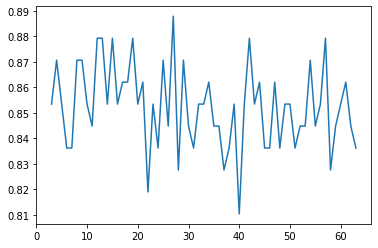

In [106]:
plot(n_value,accuracy_all)

## Accuracy for different number of neurons in two hidden layer network

In [109]:
numbers = []
numbers.append(4);
for x in range(4):
    numbers.append(numbers[x]*2)

In [110]:
numbers

[4, 8, 16, 32, 64]

In [113]:
epochs = 150
batch_size = 10
callback_early_stopping =EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

history_all = []
accuracy_all = []
n_value = []

In [114]:
for n in numbers:
    model = Sequential()
    model.add(Dense(2*n, input_dim = 11, activation = 'sigmoid'))
    model.add(Dense(n, activation = 'sigmoid'))
    model.add(Dense(4, activation ='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
    history = model.fit(X_train, Y_train, batch_size = 10, epochs = 150, validation_split= 0.15, verbose = 1, 
         callbacks = [callback_early_stopping])
    y_test,accuracy = model.evaluate(X_test, Y_test)
    history_all.append(history)
    accuracy_all.append(accuracy)
    n_value.append(n)

Train on 294 samples, validate on 52 samples
Epoch 1/150
294/294 [==============================] - 1s 2ms/step - loss: 1.4221 - accuracy: 0.2551 - val_loss: 1.4361 - val_accuracy: 0.1923
Epoch 2/150
294/294 [==============================] - 0s 585us/step - loss: 1.3979 - accuracy: 0.2551 - val_loss: 1.4123 - val_accuracy: 0.1923
Epoch 3/150
294/294 [==============================] - 0s 544us/step - loss: 1.3808 - accuracy: 0.2551 - val_loss: 1.3933 - val_accuracy: 0.1923
Epoch 4/150
294/294 [==============================] - 0s 429us/step - loss: 1.3658 - accuracy: 0.2619 - val_loss: 1.3751 - val_accuracy: 0.2115
Epoch 5/150
294/294 [==============================] - 0s 554us/step - loss: 1.3537 - accuracy: 0.2925 - val_loss: 1.3621 - val_accuracy: 0.2308
Epoch 6/150
294/294 [==============================] - 0s 732us/step - loss: 1.3423 - accuracy: 0.3129 - val_loss: 1.3479 - val_accuracy: 0.2885
Epoch 7/150
294/294 [==============================] - 0s 654us/step - loss: 1.3322 - a

Epoch 57/150
294/294 [==============================] - 0s 503us/step - loss: 0.8496 - accuracy: 0.6973 - val_loss: 0.8663 - val_accuracy: 0.6731
Epoch 58/150
294/294 [==============================] - 0s 381us/step - loss: 0.8432 - accuracy: 0.6905 - val_loss: 0.8592 - val_accuracy: 0.6731
Epoch 59/150
294/294 [==============================] - 0s 330us/step - loss: 0.8371 - accuracy: 0.6973 - val_loss: 0.8537 - val_accuracy: 0.6731
Epoch 60/150
294/294 [==============================] - 0s 346us/step - loss: 0.8314 - accuracy: 0.7007 - val_loss: 0.8483 - val_accuracy: 0.6923
Epoch 61/150
294/294 [==============================] - 0s 386us/step - loss: 0.8256 - accuracy: 0.7007 - val_loss: 0.8425 - val_accuracy: 0.6923
Epoch 62/150
294/294 [==============================] - 0s 525us/step - loss: 0.8193 - accuracy: 0.7075 - val_loss: 0.8398 - val_accuracy: 0.6923
Epoch 63/150
294/294 [==============================] - 0s 582us/step - loss: 0.8141 - accuracy: 0.7075 - val_loss: 0.8345 -

294/294 [==============================] - 0s 356us/step - loss: 0.6140 - accuracy: 0.7891 - val_loss: 0.6424 - val_accuracy: 0.8462
Epoch 114/150
294/294 [==============================] - 0s 331us/step - loss: 0.6112 - accuracy: 0.7891 - val_loss: 0.6420 - val_accuracy: 0.8462
Epoch 115/150
294/294 [==============================] - 0s 319us/step - loss: 0.6081 - accuracy: 0.7891 - val_loss: 0.6397 - val_accuracy: 0.8462
Epoch 116/150
294/294 [==============================] - 0s 351us/step - loss: 0.6055 - accuracy: 0.7959 - val_loss: 0.6371 - val_accuracy: 0.8462
Epoch 117/150
294/294 [==============================] - 0s 274us/step - loss: 0.6037 - accuracy: 0.7857 - val_loss: 0.6322 - val_accuracy: 0.8462
Epoch 118/150
294/294 [==============================] - 0s 288us/step - loss: 0.6008 - accuracy: 0.7789 - val_loss: 0.6304 - val_accuracy: 0.8462
Epoch 119/150
294/294 [==============================] - 0s 368us/step - loss: 0.5980 - accuracy: 0.7925 - val_loss: 0.6277 - val_ac

294/294 [==============================] - 0s 470us/step - loss: 0.9016 - accuracy: 0.7381 - val_loss: 0.8789 - val_accuracy: 0.7692
Epoch 19/150
294/294 [==============================] - 0s 335us/step - loss: 0.8818 - accuracy: 0.7211 - val_loss: 0.8596 - val_accuracy: 0.7692
Epoch 20/150
294/294 [==============================] - 0s 1ms/step - loss: 0.8624 - accuracy: 0.7279 - val_loss: 0.8399 - val_accuracy: 0.7692
Epoch 21/150
294/294 [==============================] - 0s 768us/step - loss: 0.8435 - accuracy: 0.7551 - val_loss: 0.8248 - val_accuracy: 0.7692
Epoch 22/150
294/294 [==============================] - 0s 973us/step - loss: 0.8259 - accuracy: 0.7517 - val_loss: 0.8075 - val_accuracy: 0.7885
Epoch 23/150
294/294 [==============================] - 0s 1ms/step - loss: 0.8104 - accuracy: 0.7483 - val_loss: 0.7917 - val_accuracy: 0.7692
Epoch 24/150
294/294 [==============================] - 0s 1ms/step - loss: 0.7933 - accuracy: 0.7551 - val_loss: 0.7752 - val_accuracy: 0.78

294/294 [==============================] - 0s 475us/step - loss: 0.5210 - accuracy: 0.7823 - val_loss: 0.5317 - val_accuracy: 0.8462
Epoch 75/150
294/294 [==============================] - 0s 471us/step - loss: 0.5195 - accuracy: 0.7857 - val_loss: 0.5329 - val_accuracy: 0.8462
Epoch 76/150
294/294 [==============================] - 0s 913us/step - loss: 0.5173 - accuracy: 0.7891 - val_loss: 0.5281 - val_accuracy: 0.8462
Epoch 77/150
294/294 [==============================] - 0s 670us/step - loss: 0.5158 - accuracy: 0.7891 - val_loss: 0.5282 - val_accuracy: 0.8462
Epoch 78/150
294/294 [==============================] - 0s 846us/step - loss: 0.5137 - accuracy: 0.7857 - val_loss: 0.5276 - val_accuracy: 0.8462
Epoch 79/150
294/294 [==============================] - 0s 751us/step - loss: 0.5113 - accuracy: 0.7925 - val_loss: 0.5256 - val_accuracy: 0.8462
Epoch 80/150
294/294 [==============================] - 0s 910us/step - loss: 0.5107 - accuracy: 0.7857 - val_loss: 0.5273 - val_accuracy

294/294 [==============================] - 0s 489us/step - loss: 0.4516 - accuracy: 0.8027 - val_loss: 0.5017 - val_accuracy: 0.8462
Epoch 131/150
294/294 [==============================] - 0s 721us/step - loss: 0.4483 - accuracy: 0.8129 - val_loss: 0.5049 - val_accuracy: 0.8462
Epoch 132/150
294/294 [==============================] - 0s 559us/step - loss: 0.4489 - accuracy: 0.8095 - val_loss: 0.5023 - val_accuracy: 0.8462
Epoch 133/150
294/294 [==============================] - 0s 333us/step - loss: 0.4477 - accuracy: 0.8129 - val_loss: 0.5108 - val_accuracy: 0.8462
Epoch 134/150
294/294 [==============================] - 0s 504us/step - loss: 0.4477 - accuracy: 0.8095 - val_loss: 0.5072 - val_accuracy: 0.8462
Epoch 135/150
294/294 [==============================] - 0s 314us/step - loss: 0.4445 - accuracy: 0.8129 - val_loss: 0.5008 - val_accuracy: 0.8462
Epoch 136/150
294/294 [==============================] - 0s 424us/step - loss: 0.4448 - accuracy: 0.8163 - val_loss: 0.5041 - val_ac

294/294 [==============================] - 0s 567us/step - loss: 0.5522 - accuracy: 0.7789 - val_loss: 0.5460 - val_accuracy: 0.8269
Epoch 36/150
294/294 [==============================] - 0s 376us/step - loss: 0.5476 - accuracy: 0.7755 - val_loss: 0.5316 - val_accuracy: 0.8654
Epoch 37/150
294/294 [==============================] - 0s 475us/step - loss: 0.5438 - accuracy: 0.7823 - val_loss: 0.5320 - val_accuracy: 0.8654
Epoch 38/150
294/294 [==============================] - 0s 737us/step - loss: 0.5421 - accuracy: 0.7823 - val_loss: 0.5263 - val_accuracy: 0.8654
Epoch 39/150
294/294 [==============================] - 0s 441us/step - loss: 0.5358 - accuracy: 0.7789 - val_loss: 0.5276 - val_accuracy: 0.8654
Epoch 40/150
294/294 [==============================] - 0s 457us/step - loss: 0.5332 - accuracy: 0.7789 - val_loss: 0.5286 - val_accuracy: 0.8654
Epoch 41/150
294/294 [==============================] - 0s 433us/step - loss: 0.5330 - accuracy: 0.7755 - val_loss: 0.5233 - val_accuracy

294/294 [==============================] - 0s 576us/step - loss: 0.6189 - accuracy: 0.7619 - val_loss: 0.5902 - val_accuracy: 0.8077
Epoch 16/150
294/294 [==============================] - 0s 396us/step - loss: 0.6070 - accuracy: 0.7687 - val_loss: 0.5921 - val_accuracy: 0.8077
Epoch 17/150
294/294 [==============================] - 0s 303us/step - loss: 0.5978 - accuracy: 0.7687 - val_loss: 0.5759 - val_accuracy: 0.8269
Epoch 18/150
294/294 [==============================] - 0s 430us/step - loss: 0.5885 - accuracy: 0.7687 - val_loss: 0.5681 - val_accuracy: 0.8077
Epoch 19/150
294/294 [==============================] - 0s 326us/step - loss: 0.5852 - accuracy: 0.7687 - val_loss: 0.5589 - val_accuracy: 0.8269
Epoch 20/150
294/294 [==============================] - 0s 503us/step - loss: 0.5766 - accuracy: 0.7755 - val_loss: 0.5406 - val_accuracy: 0.8269
Epoch 21/150
294/294 [==============================] - 0s 280us/step - loss: 0.5692 - accuracy: 0.7823 - val_loss: 0.5486 - val_accuracy

294/294 [==============================] - 0s 383us/step - loss: 0.5213 - accuracy: 0.7721 - val_loss: 0.4924 - val_accuracy: 0.8462
Epoch 28/150
294/294 [==============================] - 0s 364us/step - loss: 0.5156 - accuracy: 0.7755 - val_loss: 0.5072 - val_accuracy: 0.8462
Epoch 29/150
294/294 [==============================] - 0s 355us/step - loss: 0.5101 - accuracy: 0.7687 - val_loss: 0.5029 - val_accuracy: 0.8462
Epoch 30/150
294/294 [==============================] - 0s 350us/step - loss: 0.5002 - accuracy: 0.7789 - val_loss: 0.5156 - val_accuracy: 0.8077
Epoch 31/150
294/294 [==============================] - 0s 306us/step - loss: 0.5096 - accuracy: 0.7483 - val_loss: 0.4932 - val_accuracy: 0.8462
Epoch 32/150
294/294 [==============================] - 0s 402us/step - loss: 0.5050 - accuracy: 0.7585 - val_loss: 0.4987 - val_accuracy: 0.8462
Epoch 33/150
294/294 [==============================] - 0s 314us/step - loss: 0.4984 - accuracy: 0.7755 - val_loss: 0.4941 - val_accuracy

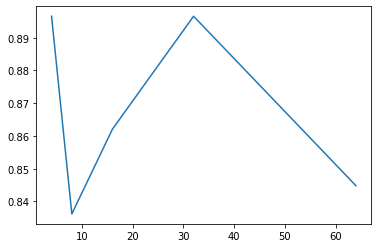

In [115]:
plot(n_value,accuracy_all)